In [1]:
# Import libraries
import pandas as pd
import numpy as np
import ast
import re
import math
from geopy.geocoders import Nominatim
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from folium.plugins import FloatImage
import folium # plotting library

import matplotlib.pyplot as plt
import seaborn as sns

# Plotly
from chart_studio import plotly 
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly as py
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
#!pip install wordcloud

In [3]:
rest_df_new = pd.read_csv(r"H:\zomato.csv", encoding='utf-8')

In [4]:
rest_df_n = rest_df_new.drop(rest_df_new[rest_df_new['location']=='Rammurthy Nagar'].index)

In [5]:
rest_df_ne = rest_df_n.drop(rest_df_n[rest_df_n['location']=='Sadashiv Nagar'].index)

In [6]:
rest_df = rest_df_ne.drop(rest_df_ne[rest_df_ne['location']=='St. Marks Road'].index)

In [7]:
rest_df = rest_df.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)

In [8]:
#rest_df_new[rest_df_new['location']=='Rammurthy Nagar'].index Sadashiv Nagar,St. Marks Road,Rammurthy Nagar

In [9]:
#rest_df = rest_df_new1.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)

In [10]:
#rest_df_new[rest_df_new['location']=='Rammurthy Nagar']

In [11]:
rest_df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [12]:
rest_df['reviews_list'] =  rest_df['reviews_list'].apply(ast.literal_eval)
rest_df['menu_item'] =  rest_df['menu_item'].apply(ast.literal_eval)

In [13]:
li = []
def func(x):
    global li
    li = li + x
_ = rest_df[rest_df['menu_item']!="[]"]['menu_item'].apply(func)

In [14]:
# convert all the menu to lower case letter and storing in the variable food_corpus
food_corpus = list(map(str.lower, set(li)))

In [15]:
menu_corpus = []
for x in food_corpus:
    menu_corpus.append(re.sub("\[.*\]|\(.*\)", "", x).strip())

In [16]:
len(menu_corpus)

70952

In [17]:
remove_words = ['poi', 'spite', 'churi', 'peni', 'packing', 'meal', 'malt', 'smilies', 'disco', 'tac', 'cap', 'spicy', 'last night', 'cop', 
'brain', 'onion', 'spice', 'holige', 'adas', 'sulaimani', 'special', 'combo 4', 'toppings', 'smile', 'water', 'ghee', '',
'mixed', 'slice', 'lunch', 'masala c', 'churi', 'breakfast combo', 'undo', 'full meal', 'fanta', 'cool blue', 'love', 'veg lovers',
'irish', 'fried', 'mast', 'rose', 'overload']

In [18]:
# Lets remove them from our corpus first
new_menu_corpus = [word for word in menu_corpus if word not in remove_words]

In [19]:
len(new_menu_corpus)

70891

In [20]:
histo = rest_df.groupby('name')['address'].count()
# Lets take the top 50 restaurantsand plot bar graph
histo = histo.sort_values()[-50:]

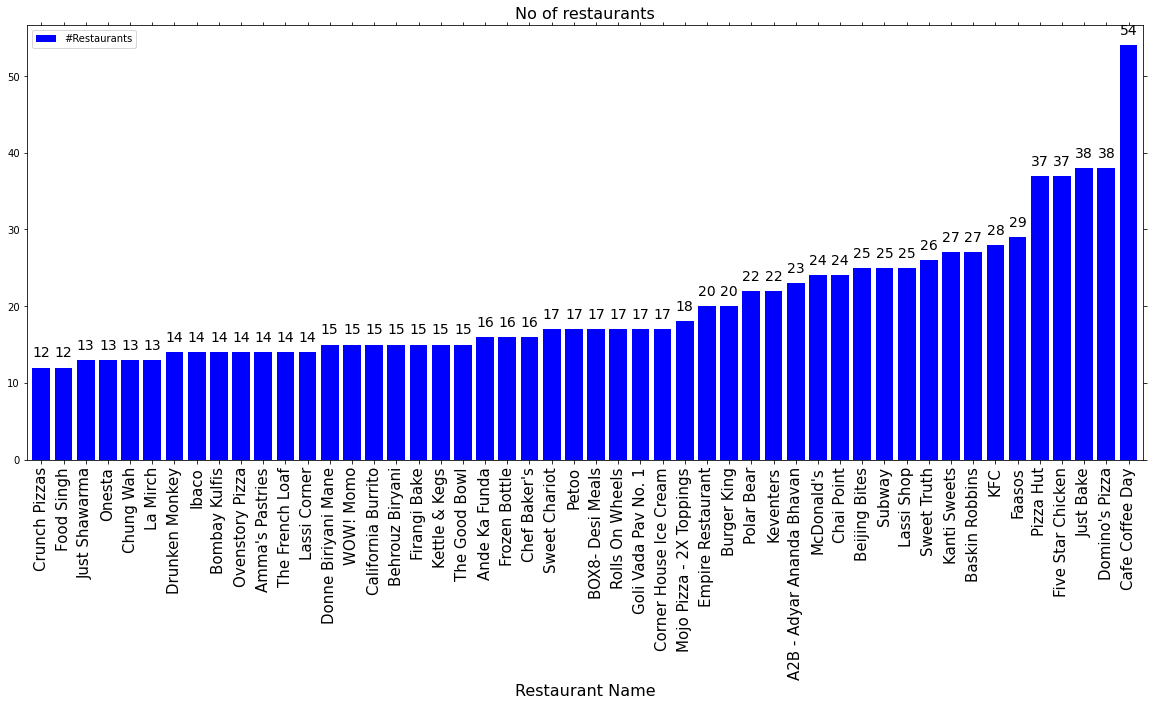

In [21]:
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Restaurant Name', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

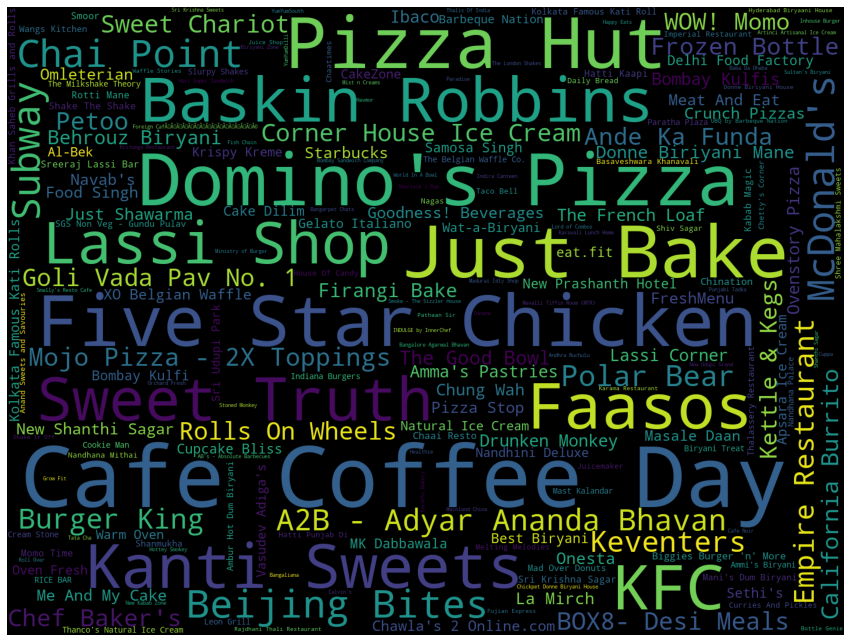

In [22]:
from subprocess import check_output
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(rest_df['name'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [23]:
#!pip install wordcloud

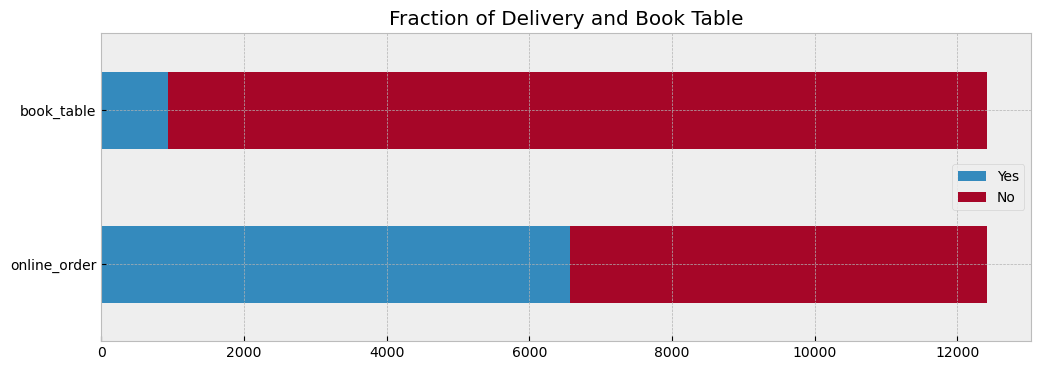

In [24]:
with plt.style.context('bmh', after_reset = True):
    plt.figure(figsize = (12,4))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['online_order', 'book_table']: 
        tmp[col] = rest_df[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)
    ax.set_title('Fraction of Delivery and Book Table')
    plt.show()

In [25]:
rest_df['rate'] = rest_df['rate'].str.split('/').str[0]

In [26]:
rest_df.loc[rest_df['rate']=="NEW", 'rate'] = np.nan
rest_df.loc[rest_df['rate']=="-", 'rate'] = np.nan

In [27]:
rest_df['rate'] = rest_df['rate'].astype('float')

In [28]:
rest_df.groupby(['location'])['rate'].mean().sort_values()[-50:][:-1]

location
Rajajinagar              3.594828
Basaveshwara Nagar       3.595522
Whitefield               3.598217
Hebbal                   3.600000
Yelahanka                3.600000
Sarjapur Road            3.603984
Vijay Nagar              3.612000
Banashankari             3.625991
Frazer Town              3.631250
Old Airport Road         3.634259
JP Nagar                 3.634677
Mysore Road              3.637500
HSR                      3.638685
New BEL Road             3.642273
Sahakara Nagar           3.645000
Koramangala 1st Block    3.647273
Kammanahalli             3.649206
Langford Town            3.650000
Koramangala 2nd Block    3.650000
HBR Layout               3.664000
Basavanagudi             3.675141
Brigade Road             3.675926
Koramangala 8th Block    3.686667
Kengeri                  3.700000
Central Bangalore        3.700000
Ulsoor                   3.713978
Koramangala              3.716667
Seshadripuram            3.723913
Malleshwaram             3.727228
Koram

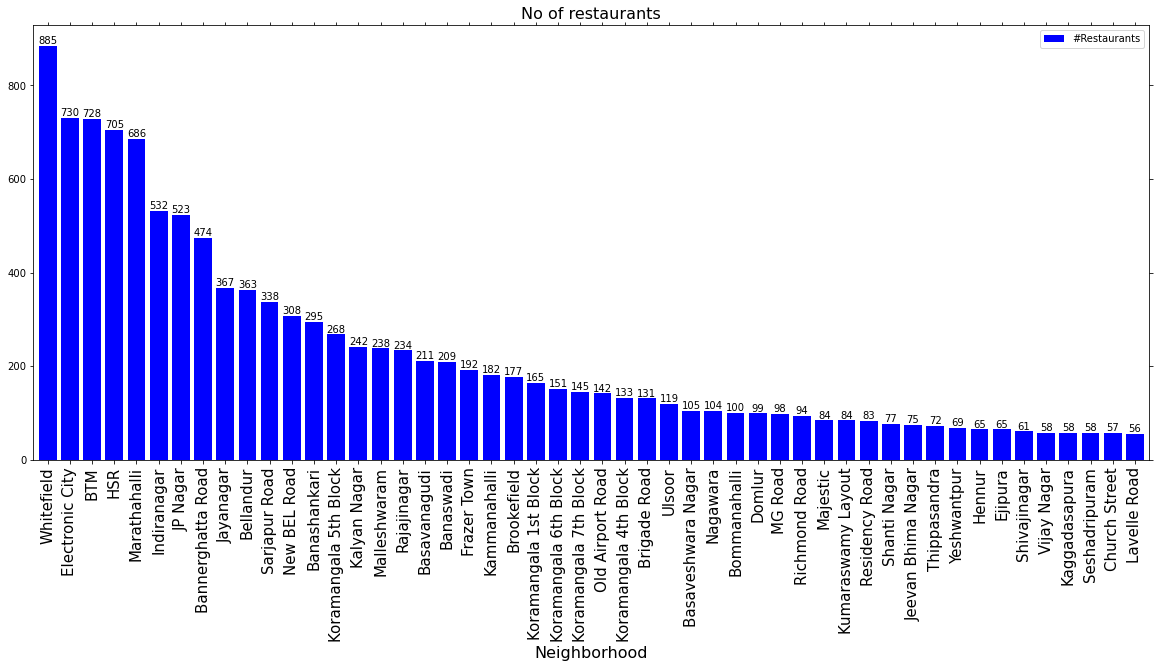

In [29]:
histo = rest_df.groupby('location')['url'].count().sort_values(ascending=False)[:50]
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

In [30]:
labels = list(rest_df.location.value_counts().index)
values = list(rest_df.location.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence in Bangalore",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Neighborhood",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

In [31]:
location = [x for x in rest_df['location'].unique().tolist() if type(x) == str]
latitude = []
longitude =  []
for i in range(0, len(location)):
    if(type(location[i]) == str):
        ctr=0
        while True:
            try:
                address = location[i] + ', Bengaluru, India'
                geolocator = Nominatim(user_agent="ny_explorer")
                loc = geolocator.geocode(address)
                latitude.append(loc.latitude)
                longitude.append(loc.longitude)
                print('The geograpical coordinate of location are {}, {}.'.format(loc.latitude, loc.longitude))
            except:
                ctr+=1
                if(ctr==7):
                    print(i)
                    latitude.append(address)
                    longitude.append(address)
                    break
                continue
            break

The geograpical coordinate of location are 12.965283249999999, 77.59445195.
The geograpical coordinate of location are 12.9417261, 77.5755021.
The geograpical coordinate of location are 12.9466619, 77.5300896.
The geograpical coordinate of location are 12.9292731, 77.5824229.
The geograpical coordinate of location are 12.9081487, 77.5553179.
The geograpical coordinate of location are 12.9274413, 77.5155224.
The geograpical coordinate of location are 12.965913650000001, 77.61250656276427.
The geograpical coordinate of location are 12.9055682, 77.5455438.
The geograpical coordinate of location are 12.9072515, 77.5782713.
The geograpical coordinate of location are 12.862467899999999, 77.56089325971044.
The geograpical coordinate of location are 12.965717999999999, 77.5762705372058.
The geograpical coordinate of location are 12.95961755, 77.51126721318181.
The geograpical coordinate of location are 12.8545439, 77.5886892.
The geograpical coordinate of location are 12.911275849999999, 77.60

In [32]:
rest_df['location_latitude'] = rest_df['location'].map(dict(zip(location, latitude)))
rest_df['location_longitude'] = rest_df['location'].map(dict(zip(location, longitude)))

In [33]:
dataframe_filtered = rest_df.groupby(['location'])['location_latitude', 'location_longitude'].first()
dataframe_filtered['no_restaurant'] = rest_df.groupby(['location'])['url'].count()
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.Marker(
            [lat, lng],
            popup= dataframe_filtered.index[i],
        )
    )
    i+=1
# add incidents to map
venues_map.add_child(states)
venues_map

C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\761938498.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [34]:
bins = pd.IntervalIndex.from_tuples([(0, 100), (101, 200), (201, 300), (301, 400), (401, 500), (501, 600), (601, 700), (701, 800), (801, 900)])
dataframe_filtered['category'] = pd.cut(dataframe_filtered['no_restaurant'], bins)

In [35]:
x = dataframe_filtered.groupby('category').groups.keys()


In [37]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
colors = ['red', 'blue', 'green', 'purple', 'orange', 'white', 'pink', 'gray', 'black']
j=0
for i in range(0,len(list(x))):
    group = dataframe_filtered.groupby('category').get_group(list(x)[i])
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)

# url = ('https://raw.githubusercontent.com/SECOORA/static_assets/'
#        'master/maps/img/rose.png')
# FloatImage(image_file, bottom=40, left=65).add_to(venues_map)
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Number of restaurants</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>0-100</li>
    <li><span style='background:blue;opacity:0.7;'></span>101-200</li>
    <li><span style='background:green;opacity:0.7;'></span>201-300</li>
    <li><span style='background:purple;opacity:0.7;'></span>301-400</li>
    <li><span style='background:orange;opacity:0.7;'></span>401-500</li>
    <li><span style='background:white;opacity:0.7;'></span>501-600</li>
    <li><span style='background:pink;opacity:0.7;'></span>601-700</li>
    <li><span style='background:gray;opacity:0.7;'></span>701-800</li>
    <li><span style='background:black;opacity:0.7;'></span>801-900</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

venues_map.get_root().add_child(macro)

venues_map

In [38]:
nb_rate_df = rest_df.groupby(['location'])['location_latitude', 'location_longitude'].first()
nb_rate_df['rate'] = rest_df.groupby(['location'])['rate'].mean()
nb_rate_df

C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3272599994.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



location_latitude  location_longitude      rate
location                                                          
BTM                        12.911276           77.604565  3.556950
Banashankari               12.965283           77.594452  3.625991
Banaswadi                  13.014162           77.651854  3.477397
Bannerghatta Road          12.854544           77.588689  3.476000
Basavanagudi               12.941726           77.575502  3.675141
...                              ...                 ...       ...
West Bangalore             13.022235           77.567183  3.400000
Whitefield                 12.969637           77.749745  3.598217
Wilson Garden              12.948934           77.596827  3.453125
Yelahanka                  13.100698           77.596345  3.600000
Yeshwantpur                13.023830           77.552921  3.490625

[90 rows x 3 columns]

In [39]:
bins = pd.IntervalIndex.from_tuples([(3.2, 3.3), (3.31, 3.4), (3.41, 3.5), (3.51, 3.6), (3.61, 3.7), (3.71, 3.8), (3.81, 3.9), (3.91, 4.0), (4.0, 4.1)])
nb_rate_df['category'] = pd.cut(nb_rate_df['rate'], bins)

In [40]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(nb_rate_df.location_latitude, nb_rate_df.location_longitude):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
colors = ['red', 'blue', 'green', 'purple', 'orange', 'white', 'pink', 'gray', 'black']
j=0
for i in range(0,len(list(x))):
    group = nb_rate_df.groupby('category').get_group(list(x)[i])
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)

# url = ('https://raw.githubusercontent.com/SECOORA/static_assets/'
#        'master/maps/img/rose.png')
# FloatImage(image_file, bottom=40, left=65).add_to(venues_map)
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Number of restaurants</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>3.2-3.3</li>
    <li><span style='background:blue;opacity:0.7;'></span>3.31-3.4</li>
    <li><span style='background:green;opacity:0.7;'></span>3.41-3.5</li>
    <li><span style='background:purple;opacity:0.7;'></span>3.51-3.6</li>
    <li><span style='background:orange;opacity:0.7;'></span>3.61-3.7</li>
    <li><span style='background:white;opacity:0.7;'></span>3.71-3.8</li>
    <li><span style='background:pink;opacity:0.7;'></span>3.81-3.9</li>
    <li><span style='background:gray;opacity:0.7;'></span>3.91-4.0</li>
    <li><span style='background:black;opacity:0.7;'></span>4.04.1</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

venues_map.get_root().add_child(macro)

venues_map

KeyError: Interval(0, 100, closed='right')

In [41]:
types = set()
def func(x):
    if(type(x) == list):
        print(x)
        for y in x:
            types.add(y.strip())
_ = rest_df['rest_type'].str.split(',').apply(func)

['Casual Dining']
['Casual Dining']
['Cafe', ' Casual Dining']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining', ' Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Cafe']
['Quick Bites', ' Cafe']
['Cafe']
['Cafe']
['Cafe', ' Quick Bites']
['Cafe']
['Cafe']
['Casual Dining', ' Cafe']
['Cafe']
['Quick Bites']
['Delivery']
['Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Mess']
['Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Dessert Parlor']
['Casual Dining']
['Quick Bites']
['Delivery']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Dessert Parlor']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Bakery', ' Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Pub']
['Bakery

['Food Court']
['Delivery']
['Delivery']
['Dessert Parlor']
['Delivery']
['Quick Bites']
['Delivery']
['Food Truck']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Delivery']
['Casual Dining']
['Dessert Parlor']
['Quick Bites']
['Bakery', ' Quick Bites']
['Dessert Parlor']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Casual Dining']
['Quick Bites', ' Beverage Shop']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Casual Dining', ' Pub']
['Quick Bites']
['Delivery']
['Delivery']
['Quick Bites']
['Quick Bites']
['Delivery']
['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Dessert Parlor']
['Casual Dining']
['Casual Dining']
['Qui

['Sweet Shop', ' Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Food Court']
['Delivery']
['Mess']
['Casual Dining']
['Quick Bites']
['Dessert Parlor', ' Bakery']
['Quick Bites']
['Casual Dining']
['Beverage Shop']
['Casual Dining']
['Quick Bites']
['Delivery']
['Takeaway', ' Delivery']
['Bakery']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Casual Dining']
['Bakery']
['Delivery']
['Delivery']
['Dessert Parlor']
['Casual Dining']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites', ' Dessert Parlor']
['Casual Dining']
['Food Court']
['Quick Bites']
['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Delivery']
['Delivery']
['Delivery']
['Delivery']
['Delivery']
['Beverage Shop', ' Quick Bites']
['Quick Bites']
['Casual Dining']
['Delivery']
['Quick Bites']
['Takeaway', ' De

['Quick Bites']
['Food Court']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Mess']
['Food Court']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Casual Dining']
['Takeaway', ' Delivery']
['Delivery']
['Delivery']
['Bakery', ' Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Food Court']
['Quick Bites']
['Quick Bites', ' Dessert Parlor']
['Takeaway', ' Delivery']
['Microbrewery', ' Pub']
['Takeaway', ' Delivery']
['Quick Bites']
['Mess']
['Food Court', ' Quick Bites']
['Quick Bites']
['Bar', ' Casual Dining']
['Takeaway', ' Delivery']
['Kiosk']
['Casual Dining']
['Takeaway', ' Delivery']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Bakery']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Beverage Shop']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Quick Bi

['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Delivery']
['Dessert Parlor']
['Takeaway', ' Delivery']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Takeaway', ' Delivery']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Cafe']
['Cafe']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Casual Dining']
['Delivery']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Dessert Parlor']
['Casual Dining']
['Dessert Parlor', ' Beverage Shop']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Casual Dining', ' Bar']
['Casual Dining']
['Casual Dining']
['Sweet Shop']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Food Court']
['Dessert Parlor']
['Casual Dining']
['Delivery']
['Quick Bites']
['Quick Bites']
['

['Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Bakery', ' Cafe']
['Casual Dining']
['Beverage Shop']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Delivery']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Cafe']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Cafe']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Cafe']
['Sweet Shop', ' Quick Bites']
['Food Court']
['Delivery']
['Quick Bites', ' Beverage Shop']
['Confectionery']
['Quick Bites']
['Dessert Parlor', ' Beverage Shop']
['Quick Bites']
['Dessert Parlor']
['Sweet Shop']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Delivery']
['Quick Bites']
['Quic

['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Cafe']
['Quick Bites']
['Quick Bites']
['Beverage Shop', ' Quick Bites']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Bakery', ' Quick Bites']
['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Delivery']
['Bakery']
['Quick Bites']
['Casual Dining']
['Casual Dining', ' Bar']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Mess']
['Takeaway']
['Takeaway', ' Delivery']
['Beverage Shop']
['Dessert Parlor', ' Quick Bites']
['Dessert Parlor']
['Dessert Parlor']
['Casual Dining']
['Delivery']
['Dessert Parlor']
['Bakery']
['Quick Bites']
['Food Court']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Bakery']
['Delivery']
['Casual Dining']
['Casual Dining']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Takeaway

['Dessert Parlor']
['Casual Dining']
['Quick Bites']
['Beverage Shop']
['Cafe']
['Dessert Parlor']
['Delivery']
['Cafe']
['Cafe', ' Casual Dining']
['Casual Dining']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Casual Dining', ' Cafe']
['Casual Dining']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Dessert Parlor']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Delivery']
['Casual Dining']
['Beverage Shop']
['Quick Bites']
['Casual Dining']
['Casual Dining']
['Dessert Parlor']
['Delivery']
['Sweet Shop', ' Quick Bites']
['Quick Bites']
['Sweet Shop']
['Sweet Shop']
['Fine Dining']
['Casual Dining']
['Casual Dining']
['Casual Dining', ' Bar']
['Quick Bites']
['Quick Bites']
['Fine Dining', ' Bar']
['Lounge', ' Bar']
['Club']
['Fine Dining', ' Bar']
['Fine Dining']
['Casual Dining']
['Fine Dining']
['Pub']
['Quick Bites']
['Casual Dinin

['Takeaway', ' Delivery']
['Food Court']
['Delivery']
['Casual Dining']
['Quick Bites', ' Beverage Shop']
['Delivery']
['Delivery']
['Delivery']
['Quick Bites']
['Food Court']
['Dessert Parlor']
['Casual Dining']
['Quick Bites']
['Beverage Shop']
['Takeaway', ' Delivery']
['Takeaway', ' Delivery']
['Quick Bites']
['Delivery']
['Quick Bites']
['Quick Bites']
['Takeaway', ' Delivery']
['Cafe']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Quick Bites']
['Cafe']
['Dessert Parlor']
['Quick Bites']
['Sweet Shop']
['Dessert Parlor']
['Quick Bites']
['Dessert Parlor']
['Dessert Parlor']
['Casual Dining']
['Quick Bites']
['Quick Bites']
['Beverage Shop']
['Quick Bites']
['Quick Bites']
['Bakery', ' Quick Bites']
['Beverage Shop', ' Quick Bites']
['Dessert Parlor']
['Casual Dining', ' Bar']
['Quick Bites']
['Quick Bites']
['Food Court']
['Casual Dining']
['Quick Bites']
['Takeaway', ' Delivery']
['Quick Bites']
['Quick Bites']


In [42]:
column_names = list(types)
# instantiate the dataframe
neighborhood = pd.DataFrame(columns=column_names)
neighborhood

Empty DataFrame
Columns: [Bar, Takeaway, Mess, Food Truck, Kiosk, Confectionery, Irani Cafee, Food Court, Beverage Shop, Casual Dining, Meat Shop, Lounge, Dhaba, Quick Bites, Fine Dining, Club, Dessert Parlor, Cafe, Pop Up, Sweet Shop, Bhojanalya, Delivery, Pub, Microbrewery, Bakery]
Index: []

[0 rows x 25 columns]

In [43]:
neighborhood['neighborhood'] = rest_df.groupby('location').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood

Bar  Takeaway  Mess  Food Truck  Kiosk  Confectionery  \
neighborhood                                                               
BTM                  0         0     0           0      0              0   
Banashankari         0         0     0           0      0              0   
Banaswadi            0         0     0           0      0              0   
Bannerghatta Road    0         0     0           0      0              0   
Basavanagudi         0         0     0           0      0              0   
...                ...       ...   ...         ...    ...            ...   
West Bangalore       0         0     0           0      0              0   
Whitefield           0         0     0           0      0              0   
Wilson Garden        0         0     0           0      0              0   
Yelahanka            0         0     0           0      0              0   
Yeshwantpur          0         0     0           0      0              0   

                   Irani Cafee  Food Court  Beverage Shop  Casual Dining  ...  \
neighborhood                                                              ...   
BTM                          0           0              0              0  ...   
Banashankari                 0           0              0              0  ...   
Banaswadi                    0           0              0              0  ...   
Bannerghatta Road            0           0              0              0  ...   
Basavanagudi                 0           0              0              0  ...   
...                        ...         ...            ...            ...  ...   
West Bangalore               0           0              0              0  ...   
Whitefield                   0           0              0              0  ...   
Wilson Garden                0           0              0              0  ...   
Yelahanka                    0           0              0              0  ...   
Yeshwantpur                  0           0              0              0  ...   

                   Club  Dessert Parlor  Cafe  Pop Up  Sweet Shop  Bhojanalya  \
neighborhood                                                                    
BTM                   0               0     0       0           0           0   
Banashankari          0               0     0       0           0           0   
Banaswadi             0               0     0       0           0           0   
Bannerghatta Road     0               0     0       0           0           0   
Basavanagudi          0               0     0       0           0           0   
...                 ...             ...   ...     ...         ...         ...   
West Bangalore        0               0     0       0           0           0   
Whitefield            0               0     0       0           0           0   
Wilson Garden         0               0     0       0           0           0   
Yelahanka             0               0     0       0           0           0   
Yeshwantpur           0               0     0       0           0           0   

                   Delivery  Pub  Microbrewery  Bakery  
neighborhood                                            
BTM                       0    0             0       0  
Banashankari              0    0             0       0  
Banaswadi                 0    0             0       0  
Bannerghatta Road         0    0             0       0  
Basavanagudi              0    0             0       0  
...                     ...  ...           ...     ...  
West Bangalore            0    0             0       0  
Whitefield                0    0             0       0  
Wilson Garden             0    0             0       0  
Yelahanka                 0    0             0       0  
Yeshwantpur               0    0             0       0  

[90 rows x 25 columns]

In [44]:
i=0
for i in range(0,len(rest_df)):
    for x in types:
        if type(rest_df.loc[i, 'rest_type']) == str and x in rest_df.loc[i, 'rest_type']:
            neighborhood.loc[rest_df.loc[i, 'location'], x] = neighborhood.loc[rest_df.loc[i, 'location'], x]+1

In [45]:
# Koramangala is divided into different block, lets combine them all
koramangala = ['Koramangala', 'Koramangala 1st Block', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block', 
'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block']
koramangala_dict = dict(neighborhood.loc[koramangala].sum())
neighborhood = neighborhood.drop(koramangala)
neighborhood.loc['Koramangala'] = koramangala_dict

In [46]:
neighborhood

Bar  Takeaway  Mess  Food Truck  Kiosk  Confectionery  \
neighborhood                                                               
BTM                  7        72     2           0      2              0   
Banashankari         6        13     2           0      0              1   
Banaswadi            4         8     3           0      2              1   
Bannerghatta Road    3        30     1           0      4              1   
Basavanagudi         4         2     0           0      1              0   
...                ...       ...   ...         ...    ...            ...   
Whitefield          19        66     8           0      9              3   
Wilson Garden        1         2     1           0      1              0   
Yelahanka            0         0     0           0      0              0   
Yeshwantpur          3         0     0           0      0              0   
Koramangala         41        47    10           0      3              0   

                   Irani Cafee  Food Court  Beverage Shop  Casual Dining  ...  \
neighborhood                                                              ...   
BTM                          0           1             44             91  ...   
Banashankari                 0           0             10             42  ...   
Banaswadi                    0           5              6             39  ...   
Bannerghatta Road            0          32             12             90  ...   
Basavanagudi                 0           0              4             33  ...   
...                        ...         ...            ...            ...  ...   
Whitefield                   0          52             23            196  ...   
Wilson Garden                0           0              0              6  ...   
Yelahanka                    0           0              0              0  ...   
Yeshwantpur                  0           4              1             14  ...   
Koramangala                  0          12             40            190  ...   

                   Club  Dessert Parlor  Cafe  Pop Up  Sweet Shop  Bhojanalya  \
neighborhood                                                                    
BTM                   0              25    28       0          14           0   
Banashankari          0              20    25       0           6           0   
Banaswadi             0               5    11       0           2           0   
Bannerghatta Road     0              32    19       0           8           0   
Basavanagudi          0              20     9       0           7           0   
...                 ...             ...   ...     ...         ...         ...   
Whitefield            0              48    36       1          13           0   
Wilson Garden         0               1     2       0           2           0   
Yelahanka             0               0     0       0           0           0   
Yeshwantpur           0               1     2       0           2           0   
Koramangala           0              76    95       0          14           0   

                   Delivery  Pub  Microbrewery  Bakery  
neighborhood                                            
BTM                     115    1             1      17  
Banashankari             25    1             0       9  
Banaswadi                15    1             0       8  
Bannerghatta Road        61    1             1      19  
Basavanagudi              2    1             0      14  
...                     ...  ...           ...     ...  
Whitefield              146   14             7      28  
Wilson Garden             3    0             0       3  
Yelahanka                 0    0             0       0  
Yeshwantpur               1    0             0       3  
Koramangala             169   18             9      32  

[82 rows x 25 columns]

In [47]:
dfs = neighborhood.reset_index().melt('neighborhood', var_name='cols',  value_name='vals')

C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\Iron Man\anacond

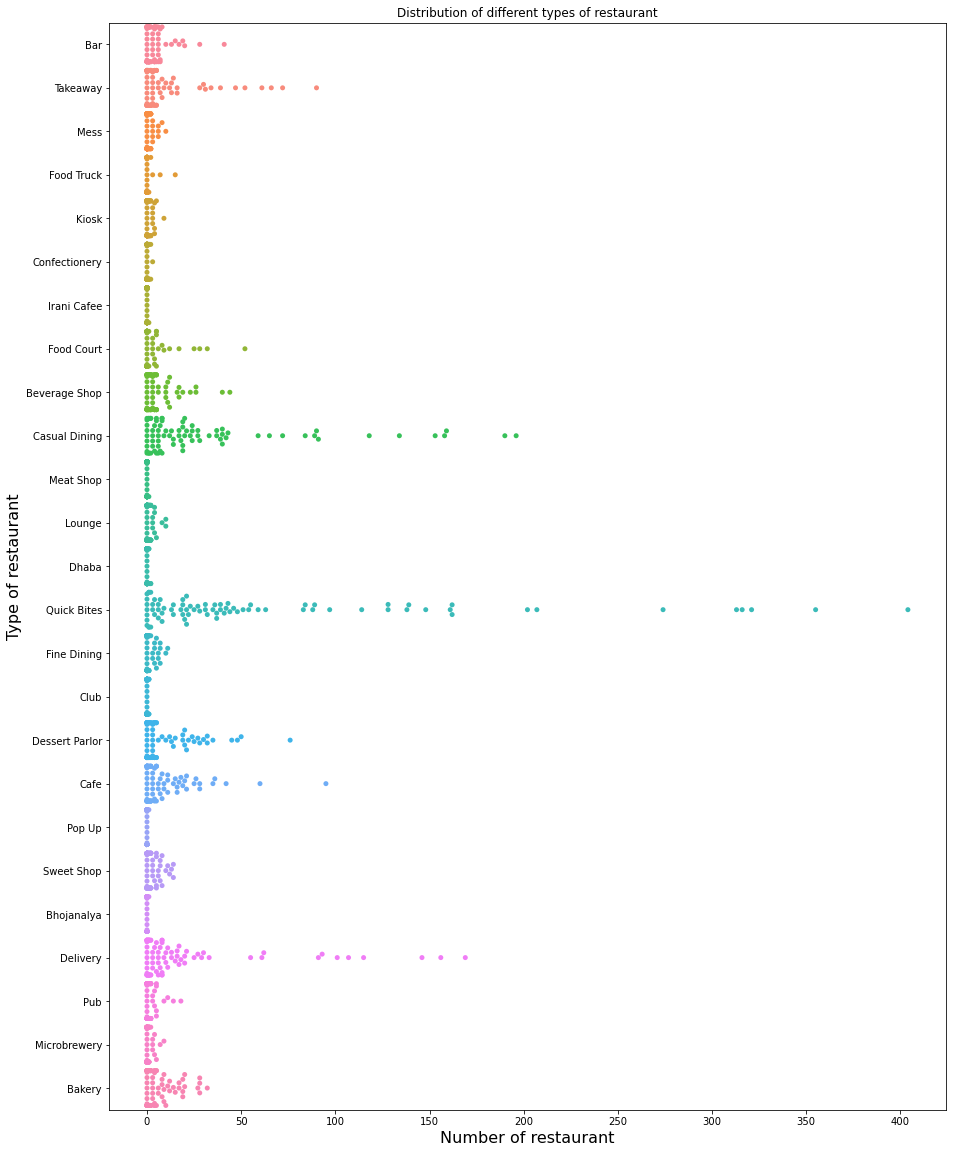

In [48]:
plt.figure(figsize=(15,20))
ax = sns.swarmplot(x="vals", y="cols", data=dfs)
ax.set_xlabel('Number of restaurant', fontsize=16)
ax.set_ylabel('Type of restaurant', fontsize=16)
ax.set_title('Distribution of different types of restaurant')
plt.savefig("swarm.png")

In [50]:
types = set()
def func(x):
    if(type(x) == list):
        for y in x:
            types.add(y.strip())
_ = rest_df['cuisines'].str.split(',').apply(func)

In [51]:
column_names = list(types)
# instantiate the dataframe
neighborhood_cns = pd.DataFrame(columns=column_names)
neighborhood_cns

Empty DataFrame
Columns: [Desserts, Wraps, Malwani, Lebanese, BBQ, American, Vegan, Mexican, Hyderabadi, Biryani, Assamese, Roast Chicken, Bubble Tea, Konkan, Paan, Rolls, Maharashtrian, South American, Malaysian, Sandwich, Grill, Steak, Iranian, Modern Indian, Finger Food, Pan Asian, Russian, Mediterranean, Spanish, Asian, Gujarati, Salad, Juices, Bengali, Healthy Food, Japanese, Mangalorean, Coffee, Lucknowi, Bar Food, Portuguese, European, Belgian, Singaporean, Continental, Korean, Momos, Beverages, South Indian, Andhra, Chettinad, Pizza, Hot dogs, Afghan, Bohri, Kebab, Chinese, Sindhi, Afghani, Bakery, Middle Eastern, Raw Meats, Rajasthani, Mughlai, Australian, Awadhi, French, Seafood, Burger, Indonesian, Greek, Street Food, Turkish, German, Charcoal Chicken, Drinks Only, Bihari, Vietnamese, North Indian, Tex-Mex, Tamil, Sushi, Oriya, Naga, Parsi, Arabian, Tea, Sri Lankan, Nepalese, Ice Cream, Jewish, Kashmiri, Tibetan, Fast Food, Mongolian, Goan, British, Thai, Cantonese, Kerala, ...]
Index: []

[0 rows x 107 columns]

In [52]:
neighborhood_cns['neighborhood'] = rest_df.groupby('location').groups.keys()
neighborhood_cns = neighborhood_cns.set_index('neighborhood').fillna(0)
neighborhood_cns

Desserts  Wraps  Malwani  Lebanese  BBQ  American  Vegan  \
neighborhood                                                                  
BTM                       0      0        0         0    0         0      0   
Banashankari              0      0        0         0    0         0      0   
Banaswadi                 0      0        0         0    0         0      0   
Bannerghatta Road         0      0        0         0    0         0      0   
Basavanagudi              0      0        0         0    0         0      0   
...                     ...    ...      ...       ...  ...       ...    ...   
West Bangalore            0      0        0         0    0         0      0   
Whitefield                0      0        0         0    0         0      0   
Wilson Garden             0      0        0         0    0         0      0   
Yelahanka                 0      0        0         0    0         0      0   
Yeshwantpur               0      0        0         0    0         0      0   

                   Mexican  Hyderabadi  Biryani  ...  Thai  Cantonese  Kerala  \
neighborhood                                     ...                            
BTM                      0           0        0  ...     0          0       0   
Banashankari             0           0        0  ...     0          0       0   
Banaswadi                0           0        0  ...     0          0       0   
Bannerghatta Road        0           0        0  ...     0          0       0   
Basavanagudi             0           0        0  ...     0          0       0   
...                    ...         ...      ...  ...   ...        ...     ...   
West Bangalore           0           0        0  ...     0          0       0   
Whitefield               0           0        0  ...     0          0       0   
Wilson Garden            0           0        0  ...     0          0       0   
Yelahanka                0           0        0  ...     0          0       0   
Yeshwantpur              0           0        0  ...     0          0       0   

                   Italian  Indian  Cafe  Mithai  North Eastern  Burmese  \
neighborhood                                                               
BTM                      0       0     0       0              0        0   
Banashankari             0       0     0       0              0        0   
Banaswadi                0       0     0       0              0        0   
Bannerghatta Road        0       0     0       0              0        0   
Basavanagudi             0       0     0       0              0        0   
...                    ...     ...   ...     ...            ...      ...   
West Bangalore           0       0     0       0              0        0   
Whitefield               0       0     0       0              0        0   
Wilson Garden            0       0     0       0              0        0   
Yelahanka                0       0     0       0              0        0   
Yeshwantpur              0       0     0       0              0        0   

                   African  
neighborhood                
BTM                      0  
Banashankari             0  
Banaswadi                0  
Bannerghatta Road        0  
Basavanagudi             0  
...                    ...  
West Bangalore           0  
Whitefield               0  
Wilson Garden            0  
Yelahanka                0  
Yeshwantpur              0  

[90 rows x 107 columns]

In [53]:
i=0
for i in range(0,len(rest_df)):
    for x in types:
        if type(rest_df.loc[i, 'cuisines']) == str and x in rest_df.loc[i, 'cuisines']:
            neighborhood_cns.loc[rest_df.loc[i, 'location'], x] = neighborhood_cns.loc[rest_df.loc[i, 'location'], x]+1

In [54]:
neighborhood_cns

Desserts  Wraps  Malwani  Lebanese  BBQ  American  Vegan  \
neighborhood                                                                  
BTM                      42      0        0         2    5         5      0   
Banashankari             26      0        0         1    0         2      0   
Banaswadi                16      0        0         0    1         0      0   
Bannerghatta Road        51      1        0         1    2         9      0   
Basavanagudi             32      0        0         0    0         0      0   
...                     ...    ...      ...       ...  ...       ...    ...   
West Bangalore            0      0        0         0    0         1      0   
Whitefield               92      0        0         0   16        22      0   
Wilson Garden             2      0        0         0    0         0      0   
Yelahanka                 0      0        0         0    0         0      0   
Yeshwantpur               3      0        0         0    0         2      0   

                   Mexican  Hyderabadi  Biryani  ...  Thai  Cantonese  Kerala  \
neighborhood                                     ...                            
BTM                      3           8      118  ...     5          0      41   
Banashankari             5           2       37  ...     5          0       0   
Banaswadi                4           2       36  ...     4          0       4   
Bannerghatta Road        7           2       70  ...     7          0      19   
Basavanagudi             0           0       16  ...     1          0       0   
...                    ...         ...      ...  ...   ...        ...     ...   
West Bangalore           0           0        2  ...     0          0       0   
Whitefield               9          15      140  ...     9          0      14   
Wilson Garden            0           0        9  ...     0          0       0   
Yelahanka                0           0        1  ...     0          0       1   
Yeshwantpur              0           2       14  ...     1          0       6   

                   Italian  Indian  Cafe  Mithai  North Eastern  Burmese  \
neighborhood                                                               
BTM                     19     385    29      17              0        0   
Banashankari            24     144    25       7              0        0   
Banaswadi                6     101    11       3              0        0   
Bannerghatta Road       14     239    23       9              0        0   
Basavanagudi             6     101     9       8              0        0   
...                    ...     ...   ...     ...            ...      ...   
West Bangalore           0       1     0       0              0        0   
Whitefield              39     478    38      17              0        0   
Wilson Garden            0      23     2       2              0        0   
Yelahanka                0       2     0       0              0        0   
Yeshwantpur              0      46     2       2              0        0   

                   African  
neighborhood                
BTM                      0  
Banashankari             0  
Banaswadi                0  
Bannerghatta Road        1  
Basavanagudi             0  
...                    ...  
West Bangalore           0  
Whitefield               1  
Wilson Garden            0  
Yelahanka                0  
Yeshwantpur              0  

[90 rows x 107 columns]

In [55]:
# Koramangala is divided into different block, lets combine them all
koramangala_dict = dict(neighborhood_cns.loc[koramangala].sum())
neighborhood_cns = neighborhood_cns.drop(koramangala)
neighborhood_cns.loc['Koramangala'] = koramangala_dict

<AxesSubplot:ylabel='neighborhood'>

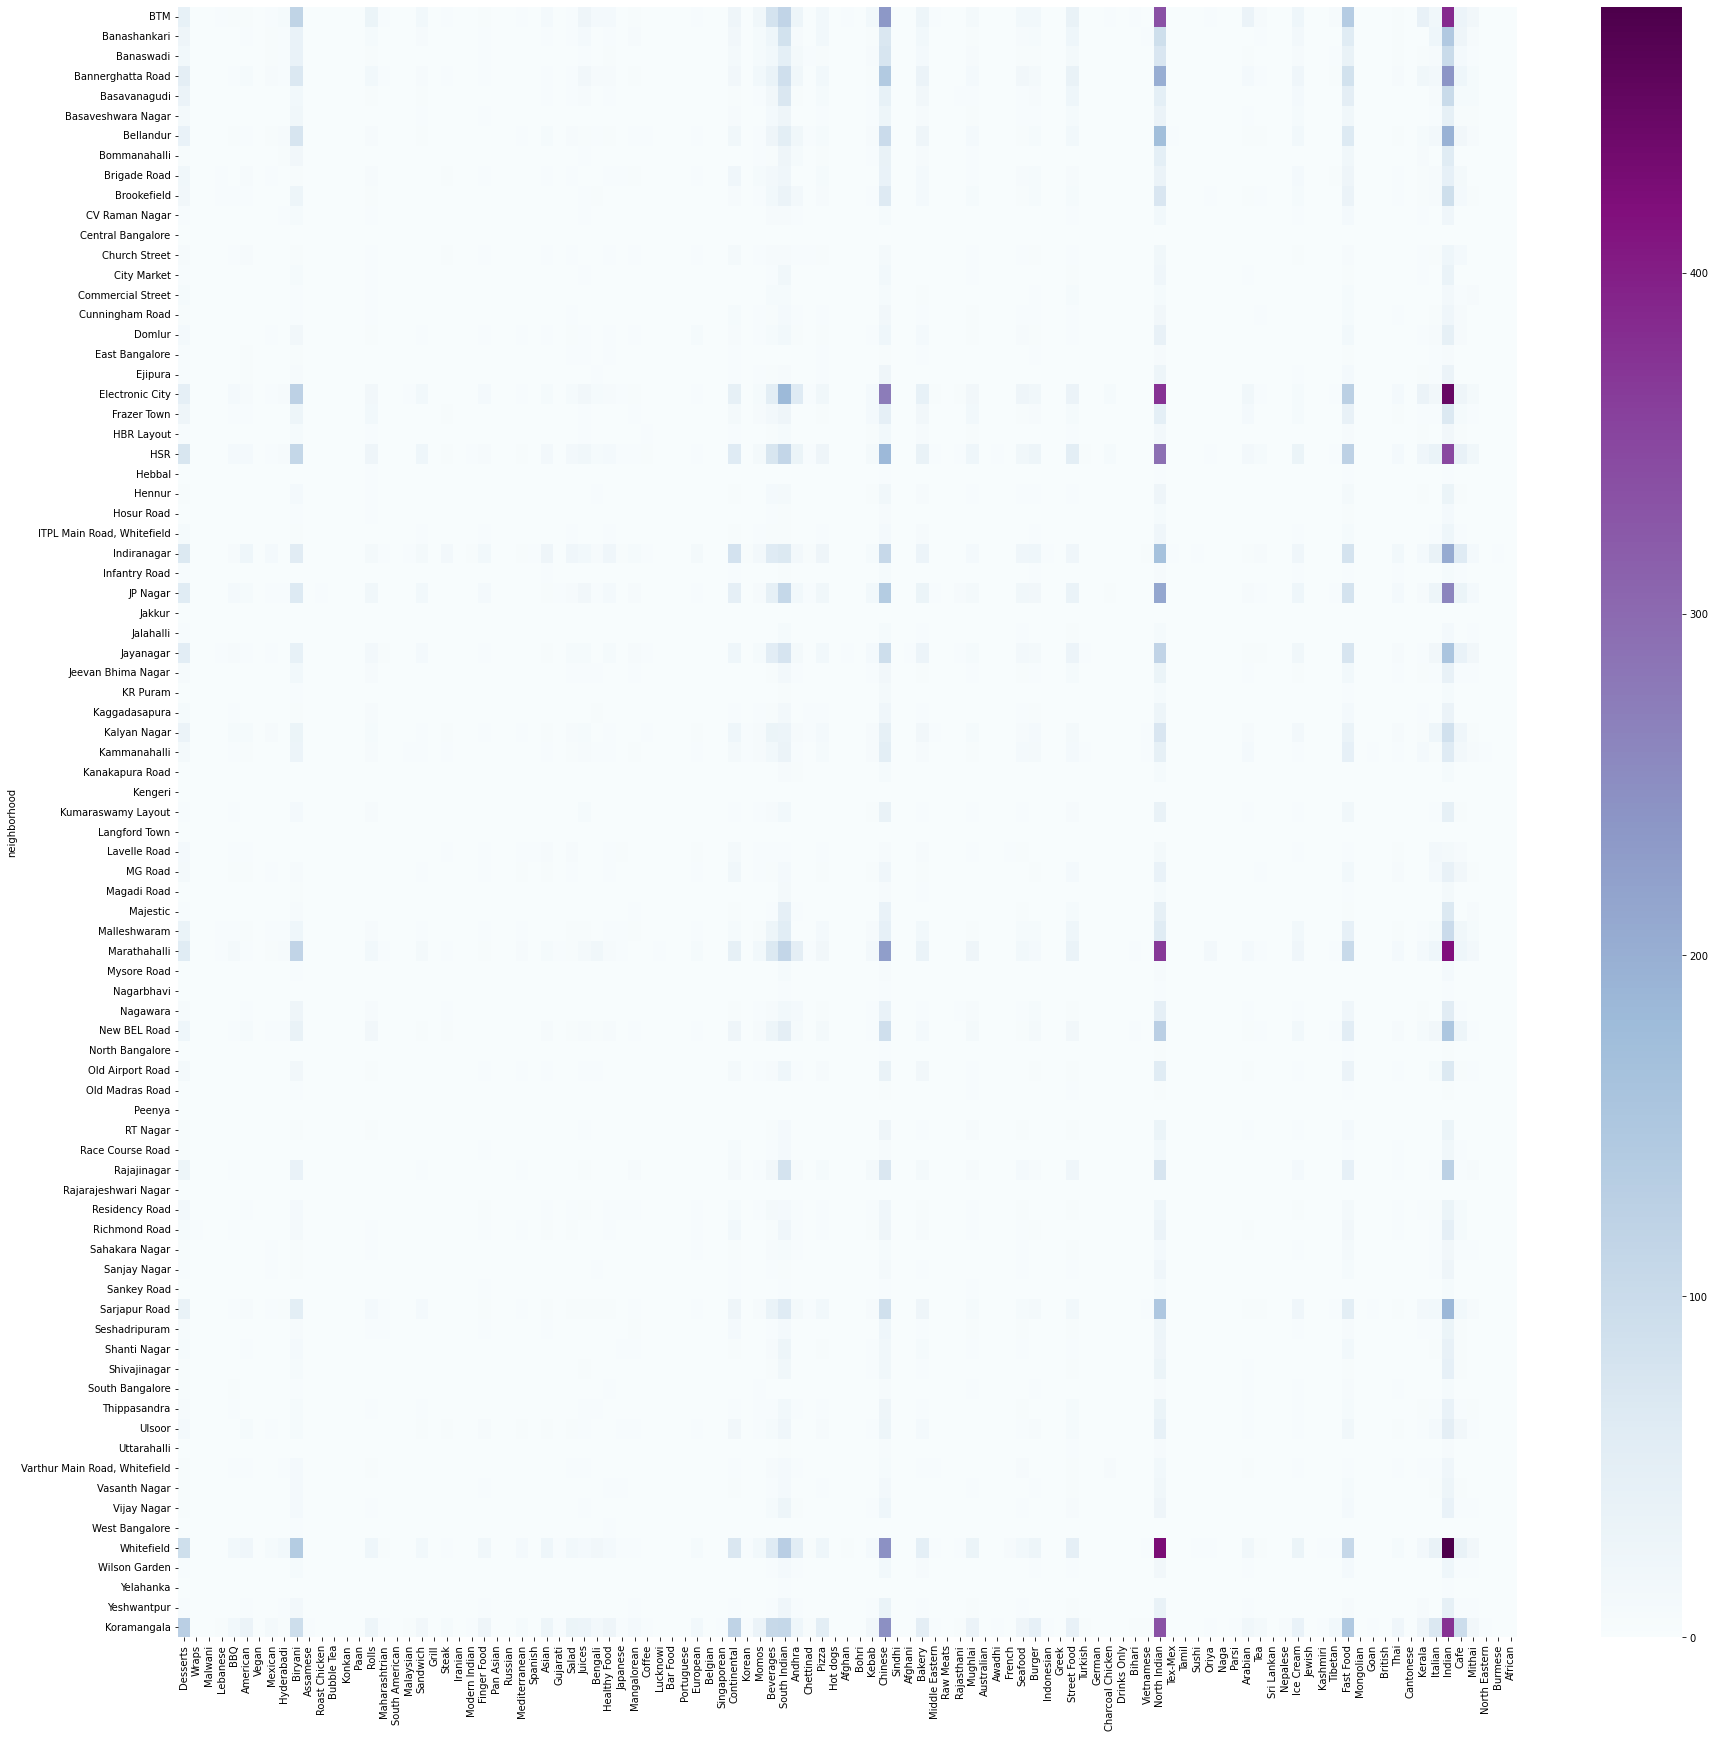

In [56]:
plt.figure(figsize=(30,30))
sns.heatmap(neighborhood_cns,cmap="BuPu")

C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



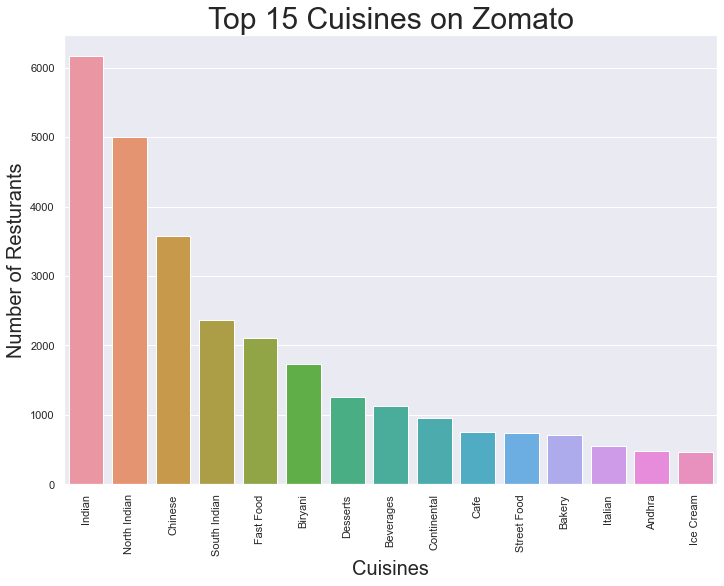

In [57]:
Cuisine_data = pd.DataFrame(neighborhood_cns.sum(axis=0))
Cuisine_data.reset_index(inplace=True)
Cuisine_data.columns = ['Cuisines', 'Number of Resturants']
Top15= (Cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(15)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top15['Cuisines'], Top15['Number of Resturants'])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 15 Cuisines on Zomato', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



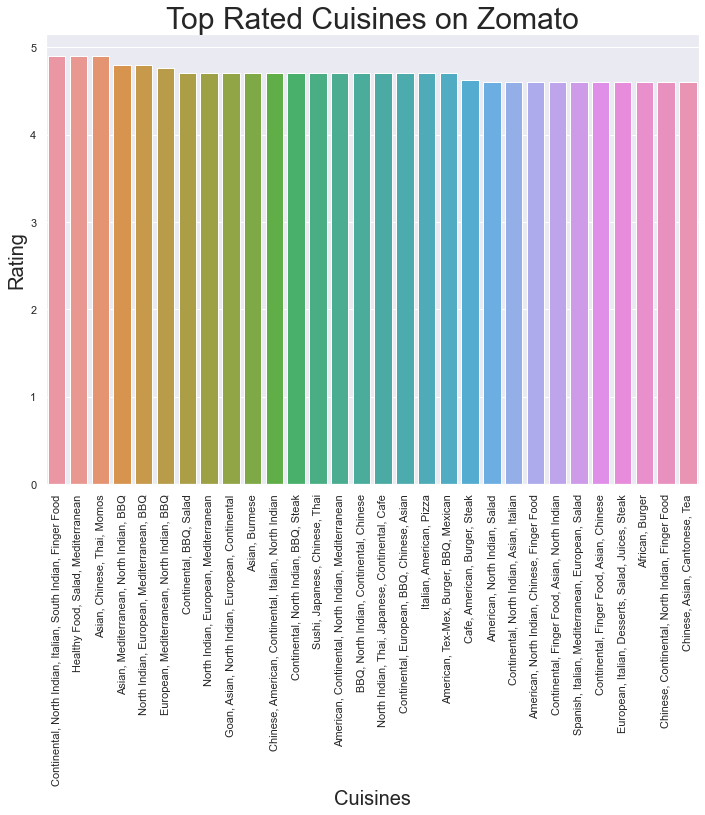

In [58]:
Cuisine_data_rating=(rest_df.groupby(['cuisines'], as_index=False)['rate'].mean())
Cuisine_data_rating.columns = ['Cuisines', 'Rating']
Top30_ratings= (Cuisine_data_rating.sort_values(['Rating'],ascending=False)).head(30)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top30_ratings['Cuisines'], Top30_ratings['Rating'])
plt.title('Top Rated Cuisines on Zomato', fontsize=30)
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Rating', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

In [59]:
listed = rest_df['listed_in(type)'].unique()
column_names = list(listed)
# instantiate the dataframe
neighborhood_lst = pd.DataFrame(columns=column_names)
neighborhood_lst

Empty DataFrame
Columns: [Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars]
Index: []

In [60]:
neighborhood_lst['neighborhood'] = rest_df.groupby('location').groups.keys()
neighborhood_lst = neighborhood_lst.set_index('neighborhood').fillna(0)
neighborhood_lst

Buffet  Cafes  Delivery  Desserts  Dine-out  \
neighborhood                                                     
BTM                     0      0         0         0         0   
Banashankari            0      0         0         0         0   
Banaswadi               0      0         0         0         0   
Bannerghatta Road       0      0         0         0         0   
Basavanagudi            0      0         0         0         0   
...                   ...    ...       ...       ...       ...   
West Bangalore          0      0         0         0         0   
Whitefield              0      0         0         0         0   
Wilson Garden           0      0         0         0         0   
Yelahanka               0      0         0         0         0   
Yeshwantpur             0      0         0         0         0   

                   Drinks & nightlife  Pubs and bars  
neighborhood                                          
BTM                                 0              0  
Banashankari                        0              0  
Banaswadi                           0              0  
Bannerghatta Road                   0              0  
Basavanagudi                        0              0  
...                               ...            ...  
West Bangalore                      0              0  
Whitefield                          0              0  
Wilson Garden                       0              0  
Yelahanka                           0              0  
Yeshwantpur                         0              0  

[90 rows x 7 columns]

In [61]:
i=0
for i in range(0,len(rest_df)):
    for x in listed:
        if type(rest_df.loc[i, 'listed_in(type)']) == str and x in rest_df.loc[i, 'listed_in(type)'] and type(rest_df.loc[i, 'location']) == str:
            neighborhood_lst.loc[rest_df.loc[i, 'location'], x] = neighborhood_lst.loc[rest_df.loc[i, 'location'], x]+1

In [62]:

# Koramangala is divided into different block, lets combine them all
koramangala = ['Koramangala', 'Koramangala 1st Block', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block', 
'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block']
koramangala_dict = dict(neighborhood_lst.loc[koramangala].sum())
neighborhood_lst = neighborhood_lst.drop(koramangala)
neighborhood_lst.loc['Koramangala'] = koramangala_dict

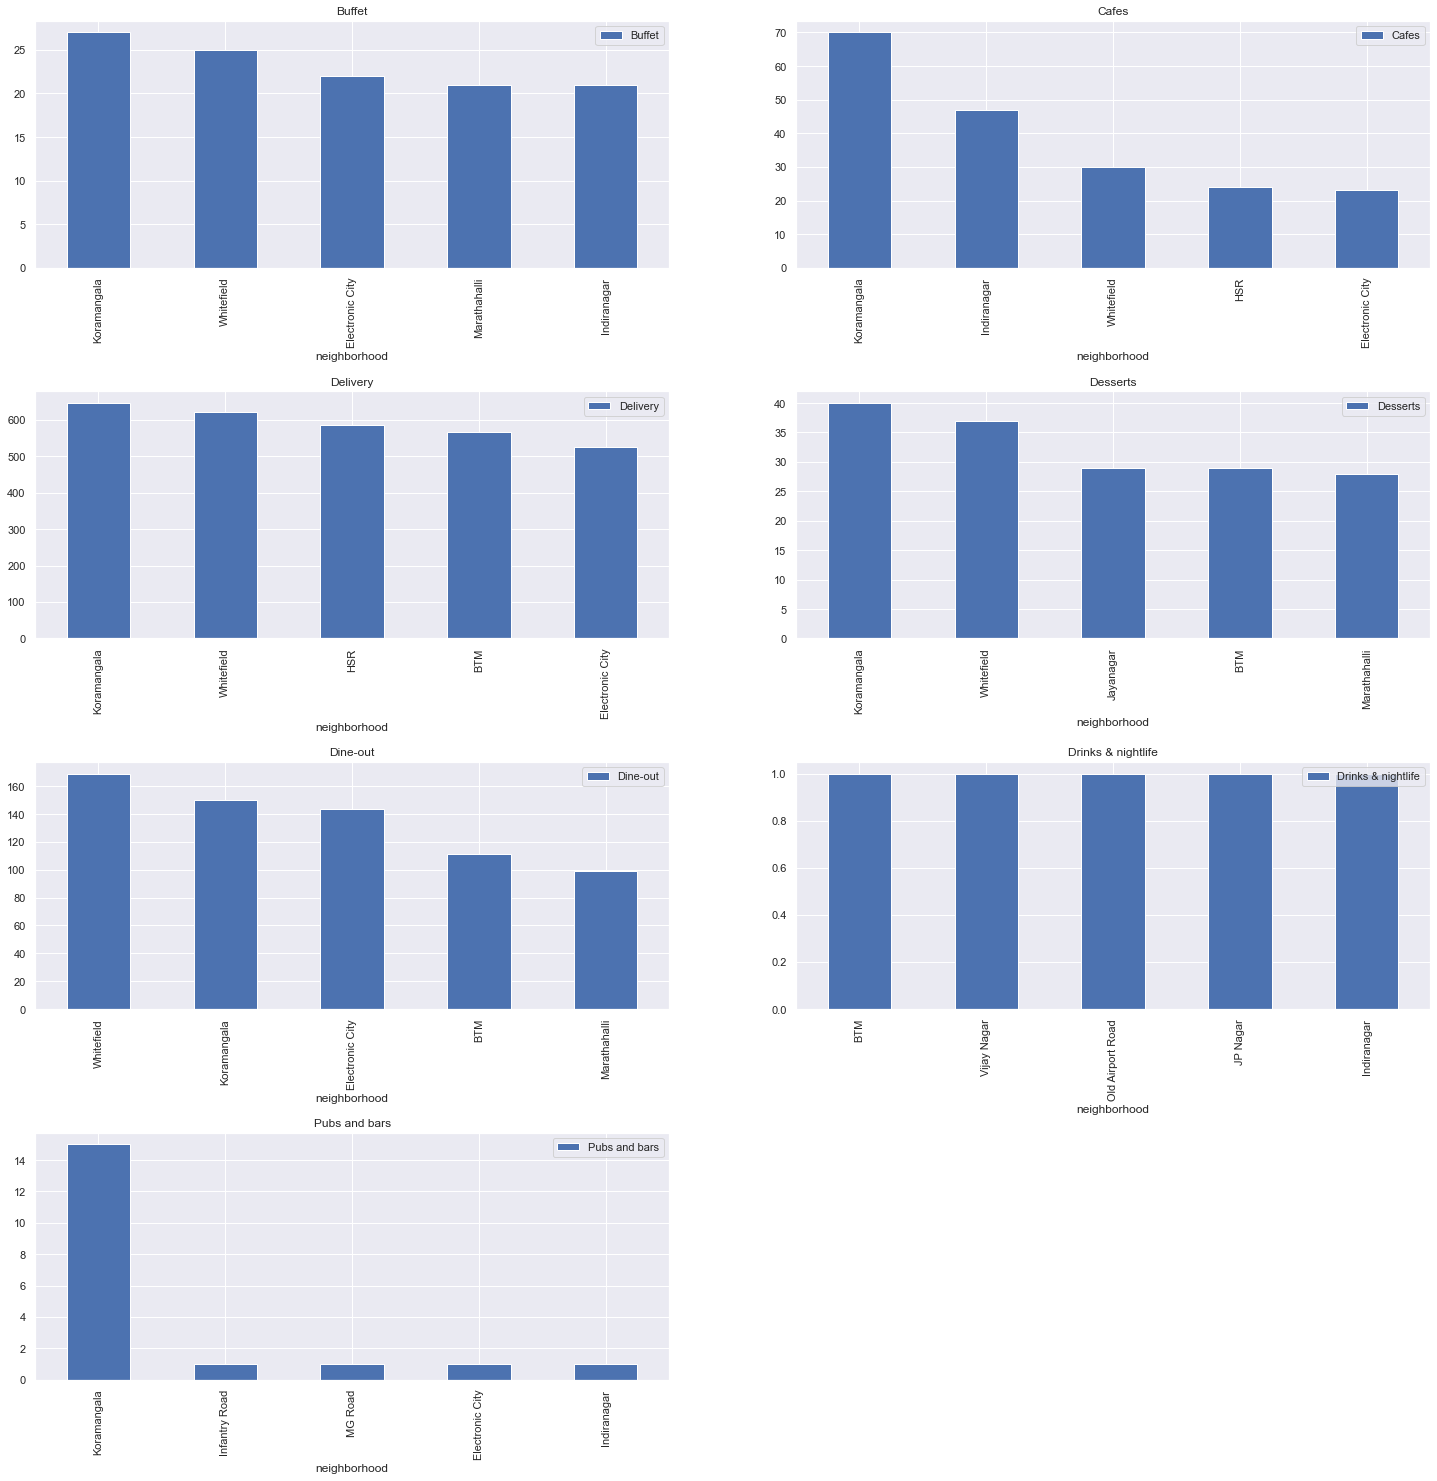

In [63]:
category = neighborhood_lst.columns
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (25,25))
fig.delaxes(ax[3,1])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
ax = ax.flatten()

for i in range(0,len(category)):
    d= neighborhood_lst[[category[i]]].sort_values(by=category[i], ascending=False).head()
    d.plot(ax=ax[i],kind='bar')
    ax[i].set_title(category[i])
    ax[i].set_xticklabels(d.index, rotation='vertical')
    
plt.show()

C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Flights')

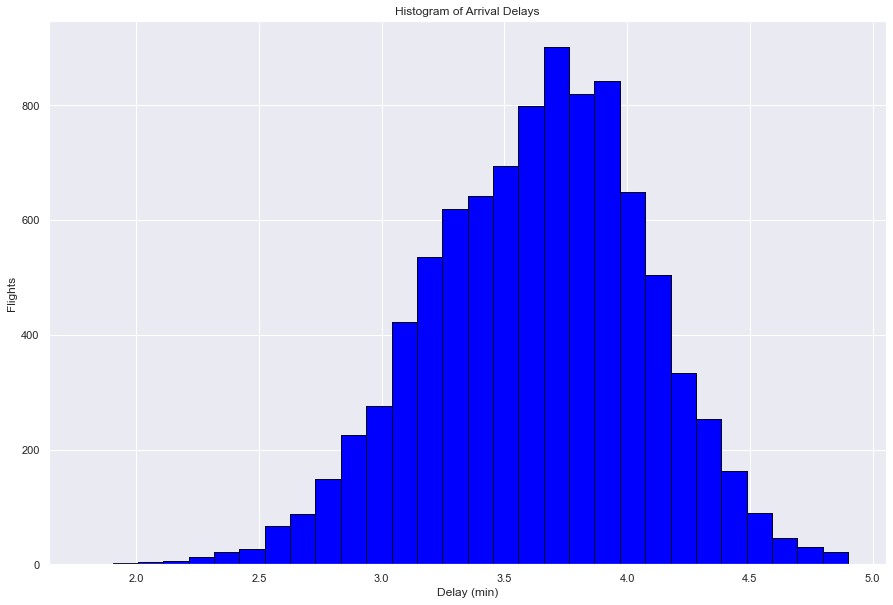

In [64]:
### Restaurant rating distibution
data = rest_df['rate'].dropna()
# matplotlib histogram
plt.figure(figsize=(15,10))
plt.hist(data, color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(data, hist=True, kde=False 
             , color = 'blue',
             bins = 30,
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [65]:
rest_df[rest_df['rate'] >= 4.8]

url  \
1994   https://www.zomato.com/bangalore/brahmins-coff...   
2087   https://www.zomato.com/bangalore/the-black-pea...   
2242   https://www.zomato.com/bangalore/byg-brewski-b...   
3032   https://www.zomato.com/bangalore/belgian-waffl...   
3882   https://www.zomato.com/bangalore/abs-absolute-...   
3883   https://www.zomato.com/bangalore/flechazo-whit...   
4234   https://www.zomato.com/bangalore/punjab-grill-...   
4871   https://www.zomato.com/bangalore/abs-absolute-...   
4882   https://www.zomato.com/bangalore/asia-kitchen-...   
5439   https://www.zomato.com/bangalore/belgian-waffl...   
5881   https://www.zomato.com/bangalore/house-of-comm...   
7390   https://www.zomato.com/bangalore/belgian-waffl...   
8266   https://www.zomato.com/bangalore/the-pizza-bak...   
8476   https://www.zomato.com/bangalore/milano-ice-cr...   
8978   https://www.zomato.com/bangalore/belgian-waffl...   
10248  https://www.zomato.com/bangalore/chilis-americ...   
10261  https://www.zomato.com/bangalore/punjab-grill-...   
10642  https://www.zomato.com/bangalore/o-g-variar-so...   
10801  https://www.zomato.com/bangalore/abs-absolute-...   
10802  https://www.zomato.com/bangalore/the-globe-gru...   
11081  https://www.zomato.com/bangalore/the-boozy-gri...   
11556  https://www.zomato.com/bangalore/sant%C3%A9-sp...   

                                                 address  \
1994   Ranga Rao Road, Near Shankar Mutt, Shankarapur...   
2087   20/7, Swamy Legato, Outer Ring Road, Kadubeesa...   
2242          Behind MK Retail, Sarjapur Road, Bangalore   
3032   65, Markham Road, Ashok Nagar, Brigade Road, B...   
3882   2nd Floor, I20-A2, EPIP Zone, Near Vydehi Hosp...   
3883   120 A3, 2nd Floor, Santosh Tower, EPIP Industr...   
4234   Ground Floor, Forum Shantiniketan, Whitefield ...   
4871   100 Feet Road, 1st Phase, Near Jayadeva Flyove...   
4882   136, Ground Floor, 1st Cross, 5th Block, Jyoti...   
5439   13 KHB Colony, 17th Main, M.I.G, Koramangala 5...   
5881   122/B, Jyothi Nivas Road, 5th Block, Koramanga...   
7390                            Vasanth Nagar, Bangalore   
8266   2985, 12th Main, HAL 2nd Stage, Indiranagar, B...   
8476   460, 2nd Cross, Krishna Temple Road, Indiranag...   
8978   5M/406, Ground Floor, 2nd Block extension, Hen...   
10248  2nd Floor, Orion Mall, Dr. Rajkumar Road, Mall...   
10261  26/1, Dr Rajkumar Road, Brigade Gateway Campus...   
10642       12th Main, 2nd Block, Rajajinagar, Bangalore   
10801  90/4, 3rd Floor, Outer Ring Road, Munnekollaly...   
10802  2nd Floor, Soul Space Paradigm, Above Bata Sho...   
11081  20/7, 4th & 5th Floor, Swamy Legato, Outer Rin...   
11556  151, 2nd Cross, Domlur 2nd Stage, Indiranagar,...   

                                                    name online_order  \
1994                                Brahmin's Coffee Bar           No   
2087                                     The Black Pearl           No   
2242                         Byg Brewski Brewing Company          Yes   
3032                              Belgian Waffle Factory          Yes   
3882                           AB's - Absolute Barbecues           No   
3883                                            Flechazo           No   
4234                                        Punjab Grill          Yes   
4871                           AB's - Absolute Barbecues           No   
4882                      Asia Kitchen By Mainland China          Yes   
5439                              Belgian Waffle Factory          Yes   
5881                                    House Of Commons           No   
7390                              Belgian Waffle Factory          Yes   
8266                                    The Pizza Bakery          Yes   
8476                                    Milano Ice Cream           No   
8978                              Belgian Waffle Factory          Yes   
10248                       Chili's American Grill & Bar          Yes   
10261                                       Punjab

In [66]:
# Now lets plot box plot based on the cost of food
bins = pd.IntervalIndex.from_tuples([(0, 500), (501, 1000), (1001, 2000), (2001, 3000), (3001, 4000), (4001, 5000), (5001, 6000)])
rest_df['cost_cat'] = pd.cut(rest_df['approx_cost(for two people)'], bins)

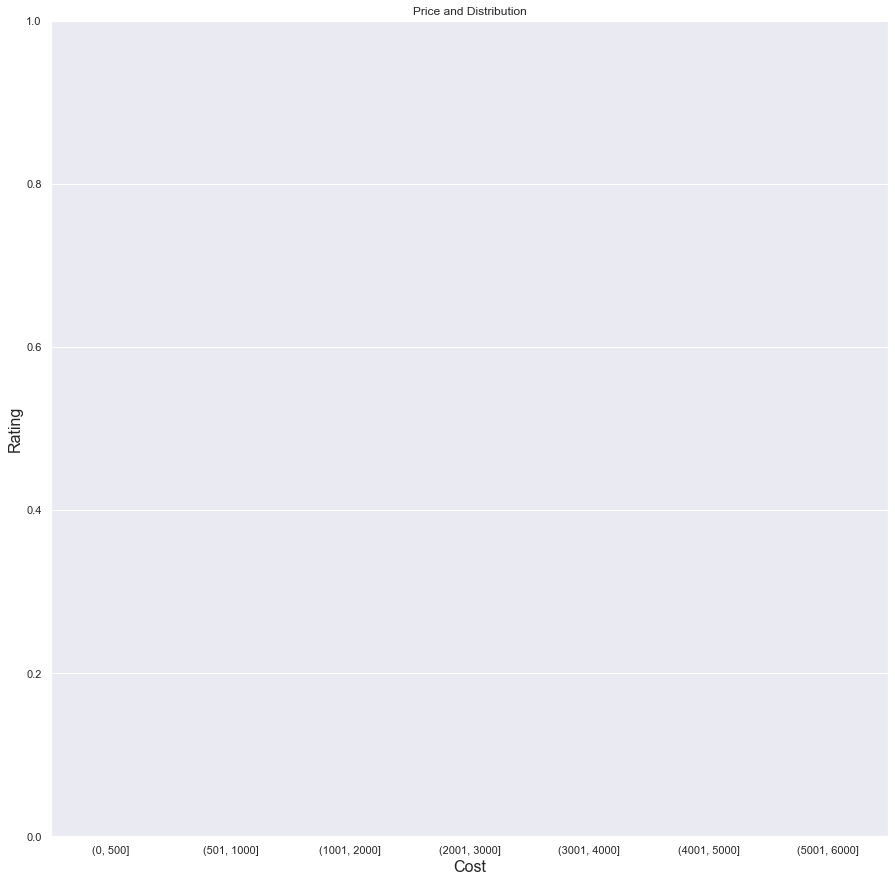

In [67]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="cost_cat", y="rate", data=rest_df)
ax.set_xlabel('Cost', fontsize=16)
ax.set_ylabel('Rating', fontsize=16)
ax.set_title('Price and Distribution')
plt.savefig("box.png")
rest_df.drop('cost_cat', axis=1, inplace=True)

In [68]:
def fun(x):
    if(type(x) == list):
        return (len(x))
    else:
        return 0
rest_df['no_of_cuisine'] = rest_df['cuisines'].str.split(',').apply(fun)

In [69]:
rest_df.groupby(['no_of_cuisine'])['rate'].mean()

no_of_cuisine
0    3.400000
1    3.583855
2    3.587695
3    3.620372
4    3.738201
5    3.789097
6    3.914706
7    3.908772
8    3.768571
Name: rate, dtype: float64

In [70]:
rest_df.drop('no_of_cuisine', axis=1, inplace=True)

In [71]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = rest_df['cuisines'].str.split(',').apply(func)

In [72]:
cui_df = rest_df[['name', 'location', 'rate', 'cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])].fillna(0)
cui_df

C:\Users\Iron Man\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



name  \
0                                                  Jalsa   
1                                         Spice Elephant   
2                                        San Churro Cafe   
3                                  Addhuri Udupi Bhojana   
4                                          Grand Village   
...                                                  ...   
12408                                 New Shalimar Hotel   
12409        Nook - Aloft Bengaluru Cessna Business Park   
12410                                   SeeYa Restaurant   
12411                                            Bhagini   
12412  Plunge - Sheraton Grand Bengaluru Whitefield H...   

                         location  rate  \
0                    Banashankari   4.1   
1                    Banashankari   4.1   
2                    Banashankari   3.8   
3                    Banashankari   3.7   
4                    Basavanagudi   3.8   
...                           ...   ...   
12408  ITPL Main Road, Whitefield   NaN   
12409                   Bellandur   4.2   
12410                    KR Puram   3.3   
12411                  Whitefield   2.5   
12412                  Whitefield   NaN   

                                          cuisines  Desserts  Wraps  Malwani  \
0                   North Indian, Mughlai, Chinese         0      0        0   
1                      Chinese, North Indian, Thai         0      0        0   
2                           Cafe, Mexican, Italian         0      0        0   
3                       South Indian, North Indian         0      0        0   
4                         North Indian, Rajasthani         0      0        0   
...                                            ...       ...    ...      ...   
12408                                 North Indian         0      0        0   
12409             North Indian, Continental, Asian         0      0        0   
12410                North Indian, Kerala, Chinese         0      0        0   
12411  Andhra, South Indian, Chinese, North Indian         0      0        0   
12412                                  Finger Food         0      0        0   

       Lebanese  BBQ  American  ...  Thai  Cantonese  Kerala  Italian  Indian  \
0             0    0         0  ...     0          0       0        0       0   
1             0    0         0  ...     0          0       0        0       0   
2             0    0         0  ...     0          0       0        0       0   
3             0    0         0  ...     0          0       0        0       0   
4             0    0         0  ...     0          0       0        0       0   
...         ...  ...       ...  ...   ...        ...     ...      ...     ...   
12408         0    0         0  ...     0          0       0        0       0   
12409         0    0         0  ...     0          0       0        0       0   
12410         0    0         0  ...     0          0       0        0       0   
12411         0    0         0  ...     0          0       0        0       0   
12412         0    0         0  ...     0          0       0        0       0   

       Cafe  Mithai  North Eastern  Burmese  African  
0         0       0              0        0        0  
1         0       0              0        0        0  
2         0       0              0        0        0  
3         0       0              0        0        0  
4         0       0              0        0        0  
...     ...     ...            ...      ...      ...  
12408     0       0              0        0        0  
12409     0       0              0        0        0  
12410     0       0              0        0        0  
12411     0       0              0        0        0  
12412     0       0              0        0        0  

[12413 rows x 111 columns]

In [73]:
for i in range(0, len(cui_df)):
    for x in cuisine:
        if type(cui_df.loc[i, 'cuisines']) == str and x in cui_df.loc[i, 'cuisines']:
            cui_df.loc[i, x] = cui_df.loc[i, x]+1

In [74]:
def set_pandas_options() -> None:
    pd.options.display.max_columns = 20
    pd.options.display.max_rows = 75
    pd.options.display.max_colwidth = 199
    pd.options.display.width = None
    # pd.options.display.precision = 2  # set as needed

set_pandas_options()

In [75]:
cui_df.groupby('rate').sum().tail(10).T

rate           4.0  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9
Desserts        93   76   60   44   29   20   13    2    4    2
Wraps            0    4    1    0    0    0    0    0    0    0
Malwani          0    0    0    0    0    0    0    0    0    0
Lebanese         1    1    3    1    0    1    0    0    0    0
BBQ              7    8   11   10    7    4    3   10    4    2
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
Cafe            65   69   59   39   26   11    9    4    0    0
Mithai          18    8    6    3    1    0    0    0    0    0
North Eastern    0    0    1    1    0    0    0    0    0    0
Burmese          1    2    0    0    1    1    0    1    0    0
African          0    0    0    1    0    0    2    0    0    0

[107 rows x 10 columns]

In [76]:
# Now can we say whcih neighborhood is famous for what type of food or cuisine
cuisine_grouped = cui_df.groupby('location').sum()
cuisine_grouped

rate  Desserts  Wraps  Malwani  Lebanese  BBQ  American  \
location                                                                       
BTM                1842.5        42      0        0         2    5         5   
Banashankari        823.1        26      0        0         1    0         2   
Banaswadi           507.7        16      0        0         0    1         0   
Bannerghatta Road  1216.6        51      1        0         1    2         9   
Basavanagudi        650.5        32      0        0         0    0         0   
...                   ...       ...    ...      ...       ...  ...       ...   
West Bangalore        6.8         0      0        0         0    0         1   
Whitefield         2220.1        92      0        0         0   16        22   
Wilson Garden       110.5         2      0        0         0    0         0   
Yelahanka            10.8         0      0        0         0    0         0   
Yeshwantpur         223.4         3      0        0         0    0         2   

                   Vegan  Mexican  Hyderabadi  ...  Thai  Cantonese  Kerala  \
location                                       ...                            
BTM                    0        3           8  ...     5          0      41   
Banashankari           0        5           2  ...     5          0       0   
Banaswadi              0        4           2  ...     4          0       4   
Bannerghatta Road      0        7           2  ...     7          0      19   
Basavanagudi           0        0           0  ...     1          0       0   
...                  ...      ...         ...  ...   ...        ...     ...   
West Bangalore         0        0           0  ...     0          0       0   
Whitefield             0        9          15  ...     9          0      14   
Wilson Garden          0        0           0  ...     0          0       0   
Yelahanka              0        0           0  ...     0          0       1   
Yeshwantpur            0        0           2  ...     1          0       6   

                   Italian  Indian  Cafe  Mithai  North Eastern  Burmese  \
location                                                                   
BTM                     19     385    29      17              0        0   
Banashankari            24     144    25       7              0        0   
Banaswadi                6     101    11       3              0        0   
Bannerghatta Road       14     239    23       9              0        0   
Basavanagudi             6     101     9       8              0        0   
...                    ...     ...   ...     ...            ...      ...   
West Bangalore           0       1     0       0              0        0   
Whitefield              39     478    38      17              0        0   
Wilson Garden            0      23     2       2              0        0   
Yelahanka                0       2     0       0              0        0   
Yeshwantpur              0      46     2       2              0        0   

                   African  
location                    
BTM                      0  
Banashankari             0  
Banaswadi                0  
Bannerghatta Road        1  
Basavanagudi             0  
...                    ...  
West Bangalore           0  
Whitefield               1  
Wilson Garden            0  
Yelahanka                0  
Yeshwantpur              0  

[90 rows x 108 columns]

In [77]:
num_top_venues = 5
for hood in cuisine_grouped.index:
    print("----"+hood+"----")
    temp = cuisine_grouped[cuisine_grouped.index == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BTM----
          venue   freq
0        Indian  385.0
1  North Indian  335.0
2       Chinese  236.0
3     Fast Food  138.0
4       Biryani  118.0


----Banashankari----
          venue   freq
0        Indian  144.0
1  North Indian   93.0
2  South Indian   85.0
3       Chinese   71.0
4     Fast Food   60.0


----Banaswadi----
          venue   freq
0        Indian  101.0
1       Chinese   77.0
2  North Indian   74.0
3  South Indian   49.0
4     Fast Food   38.0


----Bannerghatta Road----
          venue   freq
0        Indian  239.0
1  North Indian  200.0
2       Chinese  143.0
3  South Indian   91.0
4     Fast Food   85.0


----Basavanagudi----
          venue   freq
0        Indian  101.0
1  South Indian   72.0
2     Fast Food   52.0
3  North Indian   50.0
4       Chinese   42.0


----Basaveshwara Nagar----
          venue  freq
0        Indian  45.0
1  North Indian  32.0
2       Chinese  27.0
3  South Indian  25.0
4     Fast Food  19.0


----Bellandur----
          venue   freq


          venue  freq
0        Indian  37.0
1  South Indian  27.0
2  North Indian  25.0
3       Chinese  23.0
4       Biryani  11.0


----West Bangalore----
          venue  freq
0       Biryani   2.0
1  Healthy Food   2.0
2   Continental   1.0
3       Chinese   1.0
4        Burger   1.0


----Whitefield----
          venue   freq
0        Indian  478.0
1  North Indian  424.0
2       Chinese  246.0
3       Biryani  140.0
4  South Indian  132.0


----Wilson Garden----
          venue  freq
0        Indian  23.0
1  North Indian  18.0
2       Chinese  15.0
3     Fast Food  10.0
4  South Indian  10.0


----Yelahanka----
          venue  freq
0        Indian   2.0
1  South Indian   2.0
2        Kerala   1.0
3     Fast Food   1.0
4        Andhra   1.0


----Yeshwantpur----
          venue  freq
0        Indian  46.0
1  North Indian  39.0
2       Chinese  35.0
3  South Indian  22.0
4       Biryani  14.0




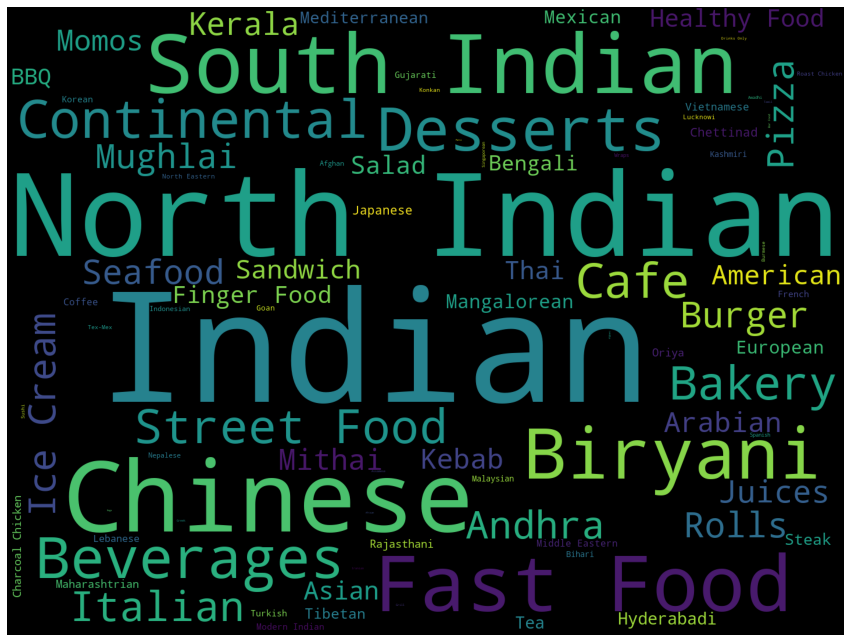

In [78]:
from subprocess import check_output
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(cuisine_grouped.iloc[:,1:].sum()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [81]:
cui_df
# Now lets plot box plot based on the cost of food
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)])
cui_df['rate_cat'] = pd.cut(cui_df['rate'], bins)
cui_df['rate_cat'] = cui_df['rate_cat'].astype(str)
cui_df['rate_cat'] = cui_df['rate_cat'].map({'(0.0, 1.0]' : 1, '(1.0, 2.0]' : 2, '(2.0, 3.0]' : 3, '(3.0, 4.0]' : 4, '(4.0, 5.0]' : 5 })

In [82]:
ra_cu = cui_df.groupby(['rate_cat']).sum()
ra_cu

Empty DataFrame
Columns: [rate, Desserts, Wraps, Malwani, Lebanese, BBQ, American, Vegan, Mexican, Hyderabadi, Biryani, Assamese, Roast Chicken, Bubble Tea, Konkan, Paan, Rolls, Maharashtrian, South American, Malaysian, Sandwich, Grill, Steak, Iranian, Modern Indian, Finger Food, Pan Asian, Russian, Mediterranean, Spanish, Asian, Gujarati, Salad, Juices, Bengali, Healthy Food, Japanese, Mangalorean, Coffee, Lucknowi, Bar Food, Portuguese, European, Belgian, Singaporean, Continental, Korean, Momos, Beverages, South Indian, Andhra, Chettinad, Pizza, Hot dogs, Afghan, Bohri, Kebab, Chinese, Sindhi, Afghani, Bakery, Middle Eastern, Raw Meats, Rajasthani, Mughlai, Australian, Awadhi, French, Seafood, Burger, Indonesian, Greek, Street Food, Turkish, German, Charcoal Chicken, Drinks Only, Bihari, Vietnamese, North Indian, Tex-Mex, Tamil, Sushi, Oriya, Naga, Parsi, Arabian, Tea, Sri Lankan, Nepalese, Ice Cream, Jewish, Kashmiri, Tibetan, Fast Food, Mongolian, Goan, British, Thai, Cantonese, ...]
Index: []

[0 rows x 108 columns]

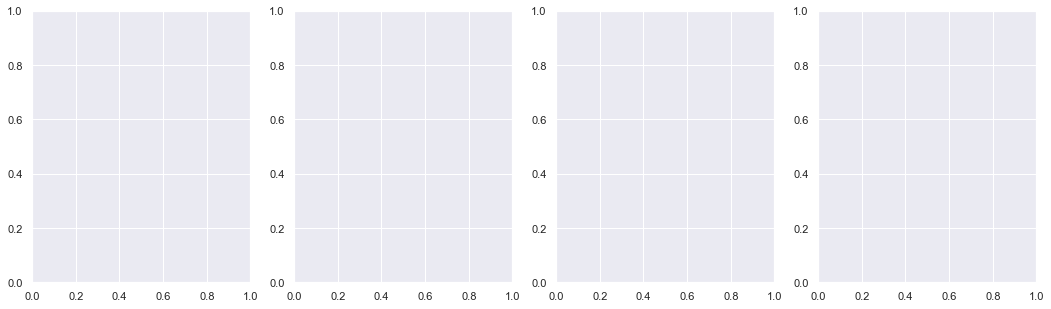

In [83]:
num_top_venues = 5
f, ax = plt.subplots(1,4, figsize = (18,5))
i = 2
for hood in ra_cu.index:
    print("----"+str(hood)+"----")
    temp = ra_cu[ra_cu.index == hood].T.reset_index()
    temp.columns = ['cuisine','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    sns.barplot(y = 'freq', x = 'cuisine', data = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues), ax = ax[i-2],)
    ax[i-2].set_title(str(i))
    ax[i-2].set_xticklabels(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues).cuisine, rotation='vertical')
    i+=1
plt.show()

In [84]:
## Now lets use ML to cluster neighborhoods by their food style
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [85]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = rest_df['cuisines'].str.split(',').apply(func)
cui_df = rest_df[['name', 'location', 'rate', 'cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])].fillna(0)
cui_df

C:\Users\Iron Man\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



name  \
0                                                        Jalsa   
1                                               Spice Elephant   
2                                              San Churro Cafe   
3                                        Addhuri Udupi Bhojana   
4                                                Grand Village   
...                                                        ...   
12408                                       New Shalimar Hotel   
12409              Nook - Aloft Bengaluru Cessna Business Park   
12410                                         SeeYa Restaurant   
12411                                                  Bhagini   
12412  Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...   

                         location  rate  \
0                    Banashankari   4.1   
1                    Banashankari   4.1   
2                    Banashankari   3.8   
3                    Banashankari   3.7   
4                    Basavanagudi   3.8   
...                           ...   ...   
12408  ITPL Main Road, Whitefield   NaN   
12409                   Bellandur   4.2   
12410                    KR Puram   3.3   
12411                  Whitefield   2.5   
12412                  Whitefield   NaN   

                                          cuisines  Desserts  Wraps  Malwani  \
0                   North Indian, Mughlai, Chinese         0      0        0   
1                      Chinese, North Indian, Thai         0      0        0   
2                           Cafe, Mexican, Italian         0      0        0   
3                       South Indian, North Indian         0      0        0   
4                         North Indian, Rajasthani         0      0        0   
...                                            ...       ...    ...      ...   
12408                                 North Indian         0      0        0   
12409             North Indian, Continental, Asian         0      0        0   
12410                North Indian, Kerala, Chinese         0      0        0   
12411  Andhra, South Indian, Chinese, North Indian         0      0        0   
12412                                  Finger Food         0      0        0   

       Lebanese  BBQ  American  ...  Thai  Cantonese  Kerala  Italian  Indian  \
0             0    0         0  ...     0          0       0        0       0   
1             0    0         0  ...     0          0       0        0       0   
2             0    0         0  ...     0          0       0        0       0   
3             0    0         0  ...     0          0       0        0       0   
4             0    0         0  ...     0          0       0        0       0   
...         ...  ...       ...  ...   ...        ...     ...      ...     ...   
12408         0    0         0  ...     0          0       0        0       0   
12409         0    0         0  ...     0          0       0        0       0   
12410         0    0         0  ...     0          0       0        0       0   
12411         0    0         0  ...     0          0       0        0       0   
12412         0    0         0  ...     0          0       0        0       0   

       Cafe  Mithai  North Eastern  Burmese  African  
0         0       0              0        0        0  
1         0       0              0        0        0  
2         0       0              0        0        0  
3         0       0              0        0        0  
4         0       0              0        0        0  
...     ...     ...            ...      ...      ...  
12408     0       0              0        0        0  
12409     0       0              0        0        0  
12410     0       0              0        0        0  
12411     0       0              0        0        0  
12412     0       0              0        0        0  

[12413 rows x 111 columns]

In [87]:
import statsmodels.formula.api as smf

In [88]:
data = [
    go.Scatter(x = rest_df['approx_cost(for two people)'],
              y = rest_df['rate'],
              mode = "markers",
               text = rest_df['name'],
               marker = dict(opacity = 0.7,
                            size = 10,
                            color = rest_df['rate'], #Set color equalivant to rating
                            colorscale= 'Viridis',
                            showscale=True,
                             maxdisplayed=2500,
                            ),
                hoverinfo="text+x+y",
              )
]
layout = go.Layout(autosize=True,
                   xaxis=dict(title="Average Cost of Two (INR)",
                             #titlefont=dict(size=20,),
                             #tickmode="linear",
                             ),
                   yaxis=dict(title="Rating",
                             #titlefont=dict(size=17,),
                             ),
                  )
iplot(dict(data=data, layout=layout))

In [89]:
pear = rest_df.dropna(subset=['approx_cost(for two people)', 'rate'])

In [90]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(pear['approx_cost(for two people)'], pear['rate']) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

TypeError: unsupported operand type(s) for +: 'float' and 'str'

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

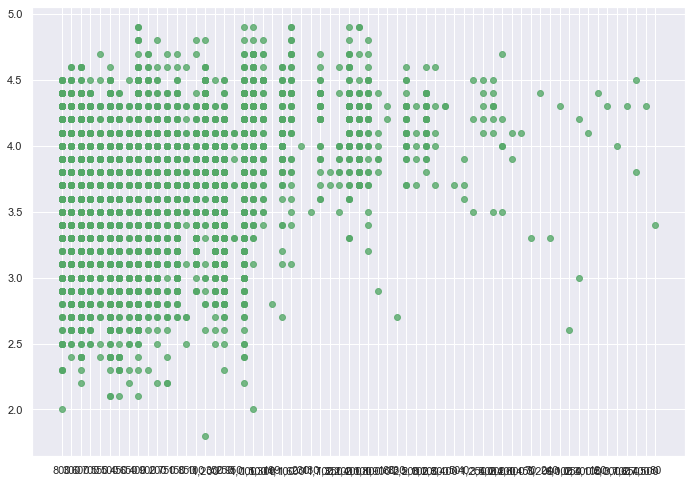

In [91]:
ax = sns.regplot(x=pear['approx_cost(for two people)'], y=pear['rate'], color="g")

In [92]:
pear = rest_df.dropna(subset=['votes', 'rate'])

In [93]:
pearson_coef, p_value = stats.pearsonr(pear['votes'], pear['rate']) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

Pearson Correlation Coefficient:  0.39853733601324703 and a P-value of: 0.0


C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Iron Man\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



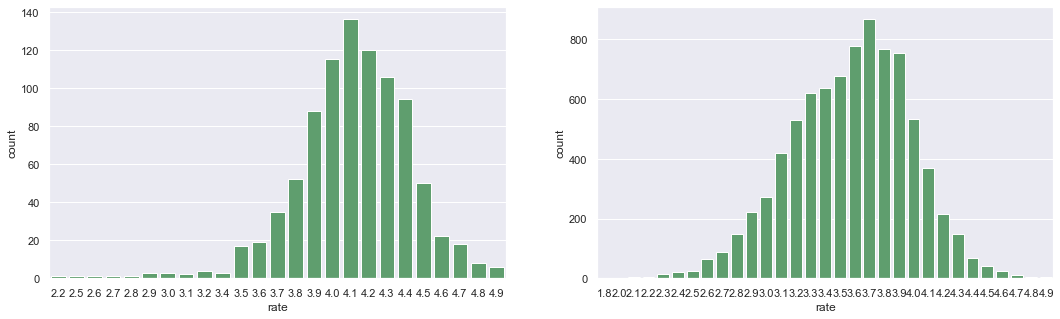

In [94]:
pear = rest_df[rest_df['book_table'] == 'Yes']
f, ax = plt.subplots(1,2, figsize = (18,5))
sns.countplot(pear['rate'], color="g", ax=ax[0])
pear = rest_df[rest_df['book_table'] == 'No']
sns.countplot(pear['rate'], color="g",  ax=ax[1])
plt.show()

In [96]:
model = smf.ols(formula='rate ~ C(book_table)', data=rest_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1510.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):          4.18e-306
Time:                        23:39:49   Log-Likelihood:                -4630.7
No. Observations:                9239   AIC:                             9265.
Df Residuals:                    9237   BIC:                             9280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.5712 

In [97]:
import requests
from pandas.io.json import json_normalize

In [98]:
CLIENT_ID = 'WPTSXRBGDLUULN1OWDRCQUAE3KIEDUNMQM5AW5Q0DH5UCCAY' # your Foursquare ID
CLIENT_SECRET = 'TR4030IUWOWEHNIZCT0EQGVC2BMLZV35KSHH404AAWSMFXAU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 9999

In [99]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [100]:
neigh_lat_lon = rest_df.groupby(['location'])['location_latitude', 'location_longitude'].first()
neigh_lat_lon

C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\2115391698.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



location_latitude  location_longitude
location                                                
BTM                        12.911276           77.604565
Banashankari               12.965283           77.594452
Banaswadi                  13.014162           77.651854
Bannerghatta Road          12.854544           77.588689
Basavanagudi               12.941726           77.575502
...                              ...                 ...
West Bangalore             13.022235           77.567183
Whitefield                 12.969637           77.749745
Wilson Garden              12.948934           77.596827
Yelahanka                  13.100698           77.596345
Yeshwantpur                13.023830           77.552921

[90 rows x 2 columns]

In [101]:
column_names = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5']
# instantiate the dataframe
df = pd.DataFrame(columns=column_names)
df

Empty DataFrame
Columns: [cat1, cat2, cat3, cat4, cat5]
Index: []

In [102]:
i=0
for lat, long in zip(neigh_lat_lon.location_latitude, neigh_lat_lon.location_longitude):
    latitude = lat
    longitude = long
    # define URL
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    # send GET request and get trending venues
    results = requests.get(url).json()
    items = results['response']['groups'][0]['items']
    
    dataframe = json_normalize(items) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean columns
    dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

    print(neigh_lat_lon.index[i], " : ",dataframe_filtered.head(5)['categories'])
    df.loc[neigh_lat_lon.index[i]] = dataframe_filtered.head(5)['categories'].tolist()
    i+=1
    

C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



BTM  :  0           Ice Cream Shop
1              Snack Place
2    Performing Arts Venue
3        Indian Restaurant
4             Burger Joint
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Banashankari  :  0               Hotel
1    Sushi Restaurant
2               Hotel
3      Ice Cream Shop
4               Hotel
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Banaswadi  :  0                   Pub
1     Indian Restaurant
2    Mexican Restaurant
3        Ice Cream Shop
4               Brewery
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Bannerghatta Road  :  0           Ice Cream Shop
1                Multiplex
2              Snack Place
3    Performing Arts Venue
4                  Brewery
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Basavanagudi  :  0      Dessert Shop
1    Breakfast Spot
2    Sandwich Place
3        Restaurant
4    Sandwich Place
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Basaveshwara Nagar  :  0    Ice Cream Shop
1            Bakery
2            Bakery
3     Shopping Mall
4         Multiplex
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Bellandur  :  0    General Entertainment
1                  Brewery
2        Indian Restaurant
3           Ice Cream Shop
4           Ice Cream Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Bommanahalli  :  0          Burger Joint
1    Italian Restaurant
2     Mobile Phone Shop
3        Ice Cream Shop
4         Movie Theater
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Brigade Road  :  0         Ice Cream Shop
1         Ice Cream Shop
2       Sushi Restaurant
3                  Hotel
4    American Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Brookefield  :  0              Brewery
1               Office
2    Indian Restaurant
3           Restaurant
4       Ice Cream Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



CV Raman Nagar  :  0                Mexican Restaurant
1                           Brewery
2                          Boutique
3    Multicuisine Indian Restaurant
4                             Hotel
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Central Bangalore  :  0       Shopping Mall
1           Multiplex
2           Multiplex
3               Hotel
4    Department Store
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Church Street  :  0    American Restaurant
1         Ice Cream Shop
2                  Plaza
3         Ice Cream Shop
4           Burger Joint
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



City Market  :  0    Breakfast Spot
1             Hotel
2      Dessert Shop
3             Hotel
4             Hotel
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Commercial Street  :  0    American Restaurant
1                  Plaza
2                  Hotel
3         Ice Cream Shop
4         Cricket Ground
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Cunningham Road  :  0               Tea Room
1    American Restaurant
2      Indian Restaurant
3                   Park
4         Cricket Ground
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Domlur  :  0     Deli / Bodega
1             Hotel
2    Ice Cream Shop
3        Restaurant
4               Spa
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



East Bangalore  :  0                  Office
1                 Brewery
2              Restaurant
3           Shopping Mall
4    Karnataka Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Ejipura  :  0    Financial or Legal Service
1                  Burger Joint
2                Clothing Store
3                Breakfast Spot
4            Italian Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Electronic City  :  0    Multicuisine Indian Restaurant
1                        Food Court
2                             Hotel
3                    Ice Cream Shop
4                       Coffee Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Frazer Town  :  0                  Pub
1       Ice Cream Shop
2                 Park
3    Indian Restaurant
4                Hotel
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



HBR Layout  :  0               Pub
1    Ice Cream Shop
2              Park
3       Coffee Shop
4               Pub
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



HSR  :  0        Ice Cream Shop
1          Burger Joint
2     Mobile Phone Shop
3          Burger Joint
4    Italian Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Hebbal  :  0    Bubble Tea Shop
1            Brewery
2        Snack Place
3      Shopping Mall
4     Ice Cream Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Hennur  :  0                   Pub
1        Ice Cream Shop
2                  Park
3                   Pub
4    Mexican Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Hosur Road  :  0                  Burger Joint
1            Italian Restaurant
2                 Movie Theater
3    Financial or Legal Service
4                Breakfast Spot
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



ITPL Main Road, Whitefield  :  0          Brewery
1    Shopping Mall
2       Restaurant
3           Office
4        BBQ Joint
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Indiranagar  :  0                Mexican Restaurant
1                          Boutique
2                           Brewery
3    Multicuisine Indian Restaurant
4                     Deli / Bodega
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Infantry Road  :  0               Tea Room
1                  Hotel
2                   Park
3      Indian Restaurant
4    American Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



JP Nagar  :  0              Snack Place
1    Performing Arts Venue
2           Ice Cream Shop
3              Pizza Place
4        Indian Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Jakkur  :  0            Brewery
1    Bubble Tea Shop
2       Dessert Shop
3        Coffee Shop
4            Brewery
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Jalahalli  :  0    Italian Restaurant
1         Shopping Mall
2             Multiplex
3             Multiplex
4                 Hotel
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Jayanagar  :  0           Sandwich Place
1             Dessert Shop
2    Performing Arts Venue
3              Snack Place
4           Breakfast Spot
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Jeevan Bhima Nagar  :  0                             Hotel
1    Multicuisine Indian Restaurant
2                     Deli / Bodega
3                          Boutique
4                           Brewery
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



KR Puram  :  0               Creperie
1          Shopping Mall
2                 Office
3                 Lounge
4    Sporting Goods Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Kaggadasapura  :  0    Mexican Restaurant
1               Brewery
2              Boutique
3                 Hotel
4            Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Kalyan Nagar  :  0                   Pub
1        Ice Cream Shop
2                  Park
3    Mexican Restaurant
4                   Pub
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Kammanahalli  :  0                   Pub
1        Ice Cream Shop
2                  Park
3    Mexican Restaurant
4                   Pub
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Kanakapura Road  :  0    Sandwich Place
1      Dessert Shop
2    Breakfast Spot
3        Restaurant
4       Pizza Place
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Kengeri  :  0                         Café
1            Indian Restaurant
2             Spiritual Center
3    Indian Chinese Restaurant
4                  Pizza Place
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Koramangala  :  0            Italian Restaurant
1                  Burger Joint
2    Financial or Legal Service
3                Breakfast Spot
4                 Movie Theater
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Koramangala 1st Block  :  0     Mobile Phone Shop
1    Italian Restaurant
2          Burger Joint
3                Bakery
4           Coffee Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Koramangala 2nd Block  :  0                  Burger Joint
1            Italian Restaurant
2    Financial or Legal Service
3                Breakfast Spot
4                 Movie Theater
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Koramangala 3rd Block  :  0                  Burger Joint
1            Italian Restaurant
2    Financial or Legal Service
3                Breakfast Spot
4                        Bakery
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Koramangala 4th Block  :  0    Italian Restaurant
1           Coffee Shop
2                Bakery
3          Burger Joint
4        Clothing Store
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Koramangala 5th Block  :  0                  Burger Joint
1    Financial or Legal Service
2            Italian Restaurant
3                Breakfast Spot
4                 Movie Theater
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Koramangala 6th Block  :  0                  Burger Joint
1    Financial or Legal Service
2                Breakfast Spot
3            Italian Restaurant
4                Clothing Store
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Koramangala 7th Block  :  0                  Burger Joint
1                 Movie Theater
2    Financial or Legal Service
3                Clothing Store
4                        Lounge
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Koramangala 8th Block  :  0                  Burger Joint
1    Financial or Legal Service
2                Breakfast Spot
3                 Movie Theater
4            Italian Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Kumaraswamy Layout  :  0              Pizza Place
1              Snack Place
2    Performing Arts Venue
3           Ice Cream Shop
4           Sandwich Place
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Langford Town  :  0    Sushi Restaurant
1               Hotel
2               Hotel
3      Ice Cream Shop
4      Ice Cream Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Lavelle Road  :  0    American Restaurant
1         Ice Cream Shop
2         Ice Cream Shop
3                  Hotel
4           Burger Joint
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



MG Road  :  0    American Restaurant
1                  Plaza
2         Ice Cream Shop
3         Ice Cream Shop
4           Burger Joint
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Magadi Road  :  0              Bakery
1              Bakery
2      Ice Cream Shop
3      Breakfast Spot
4    Asian Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Majestic  :  0             Hotel
1    Ice Cream Shop
2       Art Gallery
3    Breakfast Spot
4             Hotel
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Malleshwaram  :  0          Snack Place
1    Indian Restaurant
2    Indian Restaurant
3       Ice Cream Shop
4        Shopping Mall
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Marathahalli  :  0    Indian Restaurant
1       Ice Cream Shop
2           Steakhouse
3                  Gym
4            BBQ Joint
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Mysore Road  :  0    Breakfast Spot
1    Ice Cream Shop
2              Café
3       Pizza Place
4      Dessert Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Nagarbhavi  :  0    Ice Cream Shop
1            Bakery
2            Bakery
3    Breakfast Spot
4              Café
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Nagawara  :  0                Pub
1            Brewery
2     Ice Cream Shop
3    Bubble Tea Shop
4        Coffee Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



New BEL Road  :  0         Shopping Mall
1    Italian Restaurant
2             Multiplex
3             Multiplex
4                 Hotel
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



North Bangalore  :  0    Shopping Mall
1        Multiplex
2        Multiplex
3            Hotel
4      Snack Place
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Old Airport Road  :  0                             Hotel
1    Multicuisine Indian Restaurant
2                     Deli / Bodega
3                          Boutique
4                           Brewery
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Old Madras Road  :  0               Creperie
1          Shopping Mall
2                 Lounge
3                 Office
4    Sporting Goods Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Peenya  :  0       Shopping Mall
1           Multiplex
2           Multiplex
3               Hotel
4    Department Store
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



RT Nagar  :  0    Indian Restaurant
1       Ice Cream Shop
2          Snack Place
3                Hotel
4                 Park
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Race Course Road  :  0             Hotel
1    Ice Cream Shop
2       Art Gallery
3             Hotel
4          Tea Room
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Rajajinagar  :  0               Bakery
1               Bakery
2       Ice Cream Shop
3    Indian Restaurant
4          Snack Place
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Rajarajeshwari Nagar  :  0                         Café
1            Indian Restaurant
2    Indian Chinese Restaurant
3                  Pizza Place
4               Breakfast Spot
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Residency Road  :  0            Brewery
1    Bubble Tea Shop
2        Coffee Shop
3                Pub
4            Brewery
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Richmond Road  :  0             Hotel
1           Brewery
2      Cocktail Bar
3             Hotel
4    Ice Cream Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Sahakara Nagar  :  0               Brewery
1       Bubble Tea Shop
2    Italian Restaurant
3          Dessert Shop
4    Italian Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Sanjay Nagar  :  0    Indian Restaurant
1       Ice Cream Shop
2           Steakhouse
3                  Gym
4              Brewery
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Sankey Road  :  0                Hotel
1                Hotel
2          Art Gallery
3       Ice Cream Shop
4    Indian Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Sarjapur Road  :  0    General Entertainment
1           Ice Cream Shop
2        Indian Restaurant
3                  Brewery
4           Ice Cream Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Seshadripuram  :  0       Ice Cream Shop
1          Snack Place
2    Indian Restaurant
3                Hotel
4          Art Gallery
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Shanti Nagar  :  0    Sushi Restaurant
1               Hotel
2               Hotel
3      Ice Cream Shop
4      Ice Cream Shop
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Shivajinagar  :  0    American Restaurant
1                  Plaza
2               Tea Room
3         Ice Cream Shop
4                  Hotel
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



South Bangalore  :  0           Ice Cream Shop
1              Snack Place
2                Multiplex
3    Performing Arts Venue
4         Spiritual Center
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Thippasandra  :  0    Multicuisine Indian Restaurant
1                          Boutique
2                           Brewery
3                Mexican Restaurant
4                             Hotel
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Ulsoor  :  0                 Hotel
1                 Hotel
2    Mexican Restaurant
3                 Hotel
4      Department Store
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Uttarahalli  :  0              Pizza Place
1                     Café
2              Snack Place
3    Performing Arts Venue
4               Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Varthur Main Road, Whitefield  :  0              Creperie
1               Brewery
2                Office
3    Italian Restaurant
4            Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Vasanth Nagar  :  0                Hotel
1       Ice Cream Shop
2          Art Gallery
3                Hotel
4    Indian Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Vijay Nagar  :  0               Hotel
1             Brewery
2        Cocktail Bar
3               Hotel
4    Sushi Restaurant
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



West Bangalore  :  0    Shopping Mall
1        Multiplex
2        Multiplex
3            Hotel
4      Snack Place
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Whitefield  :  0                 Brewery
1                  Office
2              Restaurant
3                 Brewery
4    Gym / Fitness Center
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Wilson Garden  :  0    Sushi Restaurant
1        Dessert Shop
2               Hotel
3               Hotel
4        Burger Joint
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



Yelahanka  :  0       Dessert Shop
1            Brewery
2    Bubble Tea Shop
3        Coffee Shop
4           Building
Name: categories, dtype: object
Yeshwantpur  :  0       Shopping Mall
1           Multiplex
2           Multiplex
3               Hotel
4    Department Store
Name: categories, dtype: object


C:\Users\Iron Man\AppData\Local\Temp\ipykernel_9740\3809751361.py:11: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



In [103]:
df

cat1               cat2                   cat3  \
BTM                  Ice Cream Shop        Snack Place  Performing Arts Venue   
Banashankari                  Hotel   Sushi Restaurant                  Hotel   
Banaswadi                       Pub  Indian Restaurant     Mexican Restaurant   
Bannerghatta Road    Ice Cream Shop          Multiplex            Snack Place   
Basavanagudi           Dessert Shop     Breakfast Spot         Sandwich Place   
...                             ...                ...                    ...   
West Bangalore        Shopping Mall          Multiplex              Multiplex   
Whitefield                  Brewery             Office             Restaurant   
Wilson Garden      Sushi Restaurant       Dessert Shop                  Hotel   
Yelahanka              Dessert Shop            Brewery        Bubble Tea Shop   
Yeshwantpur           Shopping Mall          Multiplex              Multiplex   

                                    cat4                  cat5  
BTM                    Indian Restaurant          Burger Joint  
Banashankari              Ice Cream Shop                 Hotel  
Banaswadi                 Ice Cream Shop               Brewery  
Bannerghatta Road  Performing Arts Venue               Brewery  
Basavanagudi                  Restaurant        Sandwich Place  
...                                  ...                   ...  
West Bangalore                     Hotel           Snack Place  
Whitefield                       Brewery  Gym / Fitness Center  
Wilson Garden                      Hotel          Burger Joint  
Yelahanka                    Coffee Shop              Building  
Yeshwantpur                        Hotel      Department Store  

[90 rows x 5 columns]

In [104]:
## Now lets use ML to cluster neighborhoods by their food style
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [105]:
cuisine = set()
def func(x):
    if(type(x) == list):
        for y in x:
            cuisine.add(y.strip())
_ = rest_df['cuisines'].str.split(',').apply(func)
cui_df = rest_df[['name', 'location', 'rate', 'cuisines']]
column_names = list(cuisine)
# instantiate the dataframe
cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])] = cui_df.loc[:, ~cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])].fillna(0)
cui_df

C:\Users\Iron Man\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



name  \
0                                                        Jalsa   
1                                               Spice Elephant   
2                                              San Churro Cafe   
3                                        Addhuri Udupi Bhojana   
4                                                Grand Village   
...                                                        ...   
12408                                       New Shalimar Hotel   
12409              Nook - Aloft Bengaluru Cessna Business Park   
12410                                         SeeYa Restaurant   
12411                                                  Bhagini   
12412  Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...   

                         location  rate  \
0                    Banashankari   4.1   
1                    Banashankari   4.1   
2                    Banashankari   3.8   
3                    Banashankari   3.7   
4                    Basavanagudi   3.8   
...                           ...   ...   
12408  ITPL Main Road, Whitefield   NaN   
12409                   Bellandur   4.2   
12410                    KR Puram   3.3   
12411                  Whitefield   2.5   
12412                  Whitefield   NaN   

                                          cuisines  Desserts  Wraps  Malwani  \
0                   North Indian, Mughlai, Chinese         0      0        0   
1                      Chinese, North Indian, Thai         0      0        0   
2                           Cafe, Mexican, Italian         0      0        0   
3                       South Indian, North Indian         0      0        0   
4                         North Indian, Rajasthani         0      0        0   
...                                            ...       ...    ...      ...   
12408                                 North Indian         0      0        0   
12409             North Indian, Continental, Asian         0      0        0   
12410                North Indian, Kerala, Chinese         0      0        0   
12411  Andhra, South Indian, Chinese, North Indian         0      0        0   
12412                                  Finger Food         0      0        0   

       Lebanese  BBQ  American  ...  Thai  Cantonese  Kerala  Italian  Indian  \
0             0    0         0  ...     0          0       0        0       0   
1             0    0         0  ...     0          0       0        0       0   
2             0    0         0  ...     0          0       0        0       0   
3             0    0         0  ...     0          0       0        0       0   
4             0    0         0  ...     0          0       0        0       0   
...         ...  ...       ...  ...   ...        ...     ...      ...     ...   
12408         0    0         0  ...     0          0       0        0       0   
12409         0    0         0  ...     0          0       0        0       0   
12410         0    0         0  ...     0          0       0        0       0   
12411         0    0         0  ...     0          0       0        0       0   
12412         0    0         0  ...     0          0       0        0       0   

       Cafe  Mithai  North Eastern  Burmese  African  
0         0       0              0        0        0  
1         0       0              0        0        0  
2         0       0              0        0        0  
3         0       0              0        0        0  
4         0       0              0        0        0  
...     ...     ...            ...      ...      ...  
12408     0       0              0        0        0  
12409     0       0              0        0        0  
12410     0       0              0        0        0  
12411     0       0              0        0        0  
12412     0       0              0        0        0  

[12413 rows x 111 columns]

In [107]:
for i in range(0, len(cui_df)):
    for x in cuisine:
        if type(cui_df.loc[i, 'cuisines']) == str and x in cui_df.loc[i, 'cuisines']:
            cui_df.loc[i, x] = cui_df.loc[i, x]+1

cuisine_grouped = cui_df.groupby('location').sum()


In [108]:
#cuisine_grouped.drop('name', axis=1, inplace=True)
cuisine_grouped

rate  Desserts  Wraps  Malwani  Lebanese  BBQ  American  \
location                                                                       
BTM                1842.5        84      0        0         4   10        10   
Banashankari        823.1        52      0        0         2    0         4   
Banaswadi           507.7        32      0        0         0    2         0   
Bannerghatta Road  1216.6       102      2        0         2    4        18   
Basavanagudi        650.5        64      0        0         0    0         0   
...                   ...       ...    ...      ...       ...  ...       ...   
West Bangalore        6.8         0      0        0         0    0         2   
Whitefield         2220.1       184      0        0         0   32        44   
Wilson Garden       110.5         4      0        0         0    0         0   
Yelahanka            10.8         0      0        0         0    0         0   
Yeshwantpur         223.4         6      0        0         0    0         4   

                   Vegan  Mexican  Hyderabadi  ...  Thai  Cantonese  Kerala  \
location                                       ...                            
BTM                    0        6          16  ...    10          0      82   
Banashankari           0       10           4  ...    10          0       0   
Banaswadi              0        8           4  ...     8          0       8   
Bannerghatta Road      0       14           4  ...    14          0      38   
Basavanagudi           0        0           0  ...     2          0       0   
...                  ...      ...         ...  ...   ...        ...     ...   
West Bangalore         0        0           0  ...     0          0       0   
Whitefield             0       18          30  ...    18          0      28   
Wilson Garden          0        0           0  ...     0          0       0   
Yelahanka              0        0           0  ...     0          0       2   
Yeshwantpur            0        0           4  ...     2          0      12   

                   Italian  Indian  Cafe  Mithai  North Eastern  Burmese  \
location                                                                   
BTM                     38     770    58      34              0        0   
Banashankari            48     288    50      14              0        0   
Banaswadi               12     202    22       6              0        0   
Bannerghatta Road       28     478    46      18              0        0   
Basavanagudi            12     202    18      16              0        0   
...                    ...     ...   ...     ...            ...      ...   
West Bangalore           0       2     0       0              0        0   
Whitefield              78     956    76      34              0        0   
Wilson Garden            0      46     4       4              0        0   
Yelahanka                0       4     0       0              0        0   
Yeshwantpur              0      92     4       4              0        0   

                   African  
location                    
BTM                      0  
Banashankari             0  
Banaswadi                0  
Bannerghatta Road        2  
Basavanagudi             0  
...                    ...  
West Bangalore           0  
Whitefield               2  
Wilson Garden            0  
Yelahanka                0  
Yeshwantpur              0  

[90 rows x 108 columns]

In [109]:
# Koramangala is divided into different block, lets combine them all
koramangala = ['Koramangala', 'Koramangala 1st Block', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block', 
'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block']
koramangala_dict = dict(cuisine_grouped.loc[koramangala].sum())
cuisine_grouped = cuisine_grouped.drop(koramangala)
cuisine_grouped.loc['Koramangala'] = koramangala_dict

In [110]:
# set number of clusters
kclusters = 3

bangalore_grouped_clustering = cuisine_grouped

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangalore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [111]:
cuisine_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [112]:
cuisine_grouped.groupby('Cluster Labels').get_group(0)


Cluster Labels   rate  Desserts  Wraps  \
location                                                                
Basaveshwara Nagar                          0  240.9      26.0    0.0   
Bommanahalli                                0  173.8      10.0    0.0   
Brigade Road                                0  397.0      38.0    0.0   
CV Raman Nagar                              0  101.5       6.0    0.0   
Central Bangalore                           0    3.7       0.0    0.0   
Church Street                               0  210.5      12.0    0.0   
City Market                                 0   74.6       4.0    0.0   
Commercial Street                           0  121.2      18.0    0.0   
Cunningham Road                             0  175.6      10.0    0.0   
Domlur                                      0  260.3      20.0    0.0   
East Bangalore                              0   48.5       4.0    0.0   
Ejipura                                     0  118.1       6.0    0.0   
HBR Layout                                  0   91.6       4.0    2.0   
Hebbal                                      0   14.4       0.0    0.0   
Hennur                                      0  162.5      10.0    0.0   
Hosur Road                                  0   38.1       2.0    0.0   
ITPL Main Road, Whitefield                  0  121.7      16.0    0.0   
Infantry Road                               0   48.8       4.0    0.0   
Jakkur                                      0    0.0       0.0    0.0   
Jalahalli                                   0   52.2       4.0    0.0   
Jeevan Bhima Nagar                          0  245.7      12.0    0.0   
KR Puram                                    0   28.4       0.0    0.0   
Kaggadasapura                               0  174.5      16.0    0.0   
Kammanahalli                                0  459.8      26.0    0.0   
Kanakapura Road                             0   34.7       0.0    0.0   
Kengeri                                     0    3.7       0.0    0.0   
Kumaraswamy Layout                          0  230.1       4.0    0.0   
Langford Town                               0    7.3       0.0    0.0   
Lavelle Road                                0  211.8      22.0    0.0   
MG Road                                     0  323.8      26.0    0.0   
Magadi Road                                 0   54.7       2.0    0.0   
Majestic                                    0  216.7       6.0    0.0   
Mysore Road                                 0   29.1       0.0    0.0   
Nagarbhavi                                  0    3.4       0.0    0.0   
Nagawara                                    0  297.2      14.0    0.0   
North Bangalore                             0   13.5       0.0    0.0   
Old Airport Road                            0  392.5      26.0    0.0   
Old Madras Road                             0   30.2       0.0    0.0   
Peenya                                      0    3.2       0.0    0.0   
RT Nagar                                    0  139.0      10.0    0.0   
Race Course Road                            0  112.0       8.0    0.0   
Rajarajeshwari Nagar                        0    7.7       0.0    0.0   
Residency Road                              0  280.1      28.0    0.0   
Richmond Road                               0  253.7      16.0    6.0   
Sahakara Nagar                              0  145.8       8.0    0.0   
Sanjay Nagar                                0  103.3       6.0    0.0   
Sankey Road                                 0   48.5       2.0    0.0   
Seshadripuram                               0  171.3      12.0    0.0   
Shanti Nagar                                0  175.7      18.0    0.0   
Shivajinagar                                0  114.5       8.0    0.0   
South Bangalore                             0   62.1      10.0    0.0   
Thippasandra                                0  173.5      12.0    0.0   
Ulsoor                                      0  345.4      22.0    0.0   
Uttarahalli     

In [113]:
cuisine_grouped.groupby('Cluster Labels').get_group(1)


Cluster Labels    rate  Desserts  Wraps  Malwani  Lebanese  \
location                                                                      
BTM                           1  1842.5      84.0    0.0      0.0       4.0   
Electronic City               1  1590.3      96.0    0.0      0.0       0.0   
HSR                           1  1881.2     152.0    0.0      0.0       2.0   
Indiranagar                   1  1645.1     136.0    0.0      0.0       2.0   
Marathahalli                  1  1758.2     120.0    0.0      0.0       4.0   
Whitefield                    1  2220.1     184.0    0.0      0.0       0.0   
Koramangala                   1  2952.3     258.0    2.0      0.0       8.0   

                  BBQ  American  Vegan  Mexican  ...  Thai  Cantonese  Kerala  \
location                                         ...                            
BTM              10.0      10.0    0.0      6.0  ...  10.0        0.0    82.0   
Electronic City  20.0      14.0    0.0      6.0  ...  20.0        0.0    66.0   
HSR              20.0      20.0    0.0      6.0  ...  22.0        0.0    44.0   
Indiranagar      12.0      48.0    0.0     22.0  ...  30.0        0.0    20.0   
Marathahalli     24.0       6.0    0.0      8.0  ...  22.0        0.0    22.0   
Whitefield       32.0      44.0    0.0     18.0  ...  18.0        0.0    28.0   
Koramangala      30.0      66.0    0.0     26.0  ...  44.0        0.0    50.0   

                 Italian  Indian   Cafe  Mithai  North Eastern  Burmese  \
location                                                                  
BTM                 38.0   770.0   58.0    34.0            0.0      0.0   
Electronic City     36.0   896.0   50.0    24.0            2.0      0.0   
HSR                 70.0   696.0   82.0    38.0            0.0      0.0   
Indiranagar         78.0   412.0  124.0    20.0            0.0      4.0   
Marathahalli        46.0   836.0   46.0    28.0            0.0      0.0   
Whitefield          78.0   956.0   76.0    34.0            0.0      0.0   
Koramangala        140.0   754.0  192.0    34.0            6.0      2.0   

                 African  
location                  
BTM                  0.0  
Electronic City      0.0  
HSR                  0.0  
Indiranagar          2.0  
Marathahalli         0.0  
Whitefield           2.0  
Koramangala          0.0  

[7 rows x 109 columns]

In [114]:
map_df = pd.merge(rest_df[['location','location_latitude', 'location_longitude']].groupby('location').first(), cuisine_grouped, left_index=True, right_index=True)


In [115]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
labels = set(kmeans.labels_)
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
j=0
for label in labels:
    group = map_df.groupby('Cluster Labels').get_group(label)
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
            )
        )
        i+=1
    colors = ['blue', 'green', 'purple']
    
    x = group.index
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)



venues_map

In [116]:
types = set()
def func(x):
    if(type(x) == list):
        for y in x:
            types.add(y.strip())
_ = rest_df['rest_type'].str.split(',').apply(func)
column_names = list(types)
# instantiate the dataframe

In [117]:
neighborhood = pd.DataFrame(columns=column_names)
neighborhood
neighborhood['neighborhood'] = rest_df.groupby('location').groups.keys()
neighborhood = neighborhood.set_index('neighborhood').fillna(0)
neighborhood
i=0
for i in range(0,len(rest_df)):
    for x in types:
        if type(rest_df.loc[i, 'rest_type']) == str and x in rest_df.loc[i, 'rest_type']:
            neighborhood.loc[rest_df.loc[i, 'location'], x] = neighborhood.loc[rest_df.loc[i, 'location'], x]+1

In [118]:
neighborhood

Bar  Takeaway  Mess  Food Truck  Kiosk  Confectionery  \
neighborhood                                                               
BTM                  7        72     2           0      2              0   
Banashankari         6        13     2           0      0              1   
Banaswadi            4         8     3           0      2              1   
Bannerghatta Road    3        30     1           0      4              1   
Basavanagudi         4         2     0           0      1              0   
...                ...       ...   ...         ...    ...            ...   
West Bangalore       0         1     0           2      0              0   
Whitefield          19        66     8           0      9              3   
Wilson Garden        1         2     1           0      1              0   
Yelahanka            0         0     0           0      0              0   
Yeshwantpur          3         0     0           0      0              0   

                   Irani Cafee  Food Court  Beverage Shop  Casual Dining  ...  \
neighborhood                                                              ...   
BTM                          0           1             44             91  ...   
Banashankari                 0           0             10             42  ...   
Banaswadi                    0           5              6             39  ...   
Bannerghatta Road            0          32             12             90  ...   
Basavanagudi                 0           0              4             33  ...   
...                        ...         ...            ...            ...  ...   
West Bangalore               0           0              0              0  ...   
Whitefield                   0          52             23            196  ...   
Wilson Garden                0           0              0              6  ...   
Yelahanka                    0           0              0              0  ...   
Yeshwantpur                  0           4              1             14  ...   

                   Club  Dessert Parlor  Cafe  Pop Up  Sweet Shop  Bhojanalya  \
neighborhood                                                                    
BTM                   0              25    28       0          14           0   
Banashankari          0              20    25       0           6           0   
Banaswadi             0               5    11       0           2           0   
Bannerghatta Road     0              32    19       0           8           0   
Basavanagudi          0              20     9       0           7           0   
...                 ...             ...   ...     ...         ...         ...   
West Bangalore        0               0     0       0           0           0   
Whitefield            0              48    36       1          13           0   
Wilson Garden         0               1     2       0           2           0   
Yelahanka             0               0     0       0           0           0   
Yeshwantpur           0               1     2       0           2           0   

                   Delivery  Pub  Microbrewery  Bakery  
neighborhood                                            
BTM                     115    1             1      17  
Banashankari             25    1             0       9  
Banaswadi                15    1             0       8  
Bannerghatta Road        61    1             1      19  
Basavanagudi              2    1             0      14  
...                     ...  ...           ...     ...  
West Bangalore            2    0             0       0  
Whitefield              146   14             7      28  
Wilson Garden             3    0             0       3  
Yelahanka                 0    0             0       0  
Yeshwantpur               1    0             0       3  

[90 rows x 25 columns]

In [119]:
# Koramangala is divided into different block, lets combine them all
koramangala = ['Koramangala', 'Koramangala 1st Block', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block', 
'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block']
koramangala_dict = dict(neighborhood.loc[koramangala].sum())
neighborhood = neighborhood.drop(koramangala)
neighborhood.loc['Koramangala'] = koramangala_dict

In [120]:
# set number of clusters
kclusters = 3

bangalore_grouped_clustering = neighborhood

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangalore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 2, 2, 0, 2, 0, 0, 2])

In [122]:
# add clustering labels
#neighborhood.drop('Cluster Labels', inplace=True, axis=1)
neighborhood.insert(0, 'Cluster Labels', kmeans.labels_)

In [123]:
neighborhood[neighborhood['Cluster Labels']==0]


Cluster Labels  Bar  Takeaway  Mess  \
neighborhood                                                         
Basaveshwara Nagar                          0    2         4     0   
Bommanahalli                                0    1         7     2   
Brigade Road                                0    6         1     0   
CV Raman Nagar                              0    0         2     2   
Central Bangalore                           0    0         0     0   
Church Street                               0    6         0     0   
City Market                                 0    0         3     0   
Commercial Street                           0    0         1     0   
Cunningham Road                             0    1         0     0   
Domlur                                      0    6         3     2   
East Bangalore                              0    0         1     0   
Ejipura                                     0    0         4     1   
HBR Layout                                  0    0         2     0   
Hebbal                                      0    1         0     0   
Hennur                                      0    1         5     0   
Hosur Road                                  0    1         0     0   
ITPL Main Road, Whitefield                  0    2         5     0   
Infantry Road                               0    3         0     0   
Jakkur                                      0    0         0     0   
Jalahalli                                   0    0         0     0   
Jeevan Bhima Nagar                          0    0         3     0   
KR Puram                                    0    0         2     0   
Kaggadasapura                               0    0         4     0   
Kanakapura Road                             0    1         0     0   
Kengeri                                     0    0         0     0   
Kumaraswamy Layout                          0    1         1     0   
Langford Town                               0    1         0     0   
Lavelle Road                                0   10         0     0   
MG Road                                     0    5         3     0   
Magadi Road                                 0    0         0     0   
Majestic                                    0    7         2     0   
Mysore Road                                 0    1         0     0   
Nagarbhavi                                  0    0         0     0   
Nagawara                                    0    1         3     3   
North Bangalore                             0    0         0     0   
Old Airport Road                            0    3         9     1   
Old Madras Road                             0    0         0     0   
Peenya                                      0    0         0     0   
RT Nagar                                    0    1         3     0   
Race Course Road                            0    6         0     0   
Rajarajeshwari Nagar                        0    0         0     0   
Residency Road                              0    7         5     0   
Richmond Road                               0    4         3     0   
Sahakara Nagar                              0    1         5     0   
Sanjay Nagar                                0    1         2     1   
Sankey Road                                 0    1         0     0   
Seshadripuram                               0    4         1     1   
Shanti Nagar                                0    1         5     1   
Shivajinagar                                0    2         2     2   
South Bangalore                             0    0         4     0   
Thippasandra                                0    1        10     1   
Ulsoor                                      0    5         4     0   
Uttarahalli                                 0    0         0     0   
Varthur Main Road, Whitefield               0    1        28     0   
Vasanth Nagar                               0    4         3     0   
Vijay Nagar                              

In [124]:
neighborhood[neighborhood['Cluster Labels']==1]


Cluster Labels  Bar  Takeaway  Mess  Food Truck  Kiosk  \
neighborhood                                                              
BTM                           1    7        72     2           0      2   
Electronic City               1   17        61     6           0      1   
HSR                           1   13        90     3           0      2   
Marathahalli                  1   20        39     2           0      2   
Whitefield                    1   19        66     8           0      9   
Koramangala                   1   41        47    10           0      3   

                 Confectionery  Irani Cafee  Food Court  Beverage Shop  ...  \
neighborhood                                                            ...   
BTM                          0            0           1             44  ...   
Electronic City              0            0           8             17  ...   
HSR                          2            0           3             26  ...   
Marathahalli                 0            0          17             26  ...   
Whitefield                   3            0          52             23  ...   
Koramangala                  0            0          12             40  ...   

                 Club  Dessert Parlor  Cafe  Pop Up  Sweet Shop  Bhojanalya  \
neighborhood                                                                  
BTM                 0              25    28       0          14           0   
Electronic City     0              19    20       0           7           0   
HSR                 0              50    42       0          10           0   
Marathahalli        0              32    21       0          11           0   
Whitefield          0              48    36       1          13           0   
Koramangala         0              76    95       0          14           0   

                 Delivery  Pub  Microbrewery  Bakery  
neighborhood                                          
BTM                   115    1             1      17  
Electronic City       107    4             1      27  
HSR                   156    2             0      28  
Marathahalli          101    9             1      28  
Whitefield            146   14             7      28  
Koramangala           169   18             9      32  

[6 rows x 26 columns]

In [125]:
neighborhood[neighborhood['Cluster Labels']==2]


Cluster Labels  Bar  Takeaway  Mess  Food Truck  Kiosk  \
neighborhood                                                                
Banashankari                    2    6        13     2           0      0   
Banaswadi                       2    4         8     3           0      2   
Bannerghatta Road               2    3        30     1           0      4   
Basavanagudi                    2    4         2     0           0      1   
Bellandur                       2    6        31     6           0      5   
Brookefield                     2    2         6     3           0      0   
Frazer Town                     2    0        13     0           0      1   
Indiranagar                     2   28        34     2           0      2   
JP Nagar                        2   15        52     3           0      3   
Jayanagar                       2    4         6     0           0      3   
Kalyan Nagar                    2    4         8     0           0      3   
Kammanahalli                    2    4        16     1           0      1   
Malleshwaram                    2    5         2     2           0      0   
New BEL Road                    2    3        12     6           0      0   
Rajajinagar                     2    8        14     0           0      1   
Sarjapur Road                   2    6        16     0           0      1   

                   Confectionery  Irani Cafee  Food Court  Beverage Shop  ...  \
neighborhood                                                              ...   
Banashankari                   1            0           0             10  ...   
Banaswadi                      1            0           5              6  ...   
Bannerghatta Road              1            0          32             12  ...   
Basavanagudi                   0            0           0              4  ...   
Bellandur                      0            0          28             11  ...   
Brookefield                    0            0           5              6  ...   
Frazer Town                    0            0           0              4  ...   
Indiranagar                    0            0           0             17  ...   
JP Nagar                       0            0           6             19  ...   
Jayanagar                      0            0           3             16  ...   
Kalyan Nagar                   0            0           0             11  ...   
Kammanahalli                   0            0           0              5  ...   
Malleshwaram                   2            0          25             10  ...   
New BEL Road                   0            0           0             10  ...   
Rajajinagar                    1            0           3              5  ...   
Sarjapur Road                  0            0           0             12  ...   

                   Club  Dessert Parlor  Cafe  Pop Up  Sweet Shop  Bhojanalya  \
neighborhood                                                                    
Banashankari          0              20    25       0           6           0   
Banaswadi             0               5    11       0           2           0   
Bannerghatta Road     0              32    19       0           8           0   
Basavanagudi          0              20     9       0           7           0   
Bellandur             1              21    16       0           3           0   
Brookefield           0              10     9       0           3           0   
Frazer Town           0              15     8       0           2           0   
Indiranagar           0              45    60       0           7           0   
JP Nagar              0              30    28       0           6           0   
Jayanagar             0              35    35       0          12           0   
Kalyan Nagar          0              28    21       0           2           0   
Kammanahalli          0               4    14       0           4           0   
Malleshwaram          0              27

In [126]:
type_df = pd.merge(rest_df[['location','location_latitude', 'location_longitude']].groupby('location').first(), neighborhood, left_index=True, right_index=True)


In [127]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
labels = set(kmeans.labels_)
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
j=0
for label in labels:
    group = type_df.groupby('Cluster Labels').get_group(label)
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6,
            )
        )
        i+=1
    colors = ['red', 'blue', 'green']
    
    x = group.index
    i=0
    for lat, lng, in zip(group.location_latitude, group.location_longitude):
        states.add_child(
            folium.features.Marker(
                [lat, lng],
                popup= group.index[i],
                icon=folium.Icon(color=colors[j], icon='cloud')
            )
        )
        i+=1
    j+=1
# add incidents to map
venues_map.add_child(states)



venues_map